<div style="text-align: center; position: relative;">
    <hr style="border:0; background-color:#2E8B57; height:2px; width:90%; margin:10px auto;"> <!-- Sea Green color -->
    <span style="position: absolute; left: 50%; top: -12px; background-color: black; padding: 0 10px; transform: translateX(-50%);">
        Step1: Imports
    </span>
</div>

In [1]:
# Standard Libraries
import time
import warnings

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sweetviz as sv
import dtale 

# Machine Learning Models and Utilities
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Model Utilities
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, \
    roc_auc_score, roc_curve

# Explainable AI
import shap


c:\Users\murta\OneDrive\Desktop\ML&DE\second-semester\Introduction ML\Home work\ML\Google Advanced data\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="text-align: center; position: relative;">
    <hr style="border:0; background-color:#2E8B57; height:2px; width:90%; margin:10px auto;"> <!-- Sea Green color -->
    <span style="position: absolute; left: 50%; top: -12px; background-color: black; padding: 0 10px; transform: translateX(-50%);">
        Step 2: Data Exploration (Initial EDA and Data cleaning)
    </span>
</div>

In [2]:
# Load the dataset
# Assuming the dataset is in a CSV file named 'employee_data.csv'
data = pd.read_csv("HR_comma_sep.csv")

# Display the first 6 rows of the dataset
data.head(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Displaying Statistical Summary of the Dataset
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Renaming Columns for Clarity and Consistency
data = data.rename(columns = {
    "average_montly_hours":"average_monthly_hours",
    "time_spend_company" : "tenure",
    "Work_accident":"work_accident",
    "Department":"department" 
    })

In [6]:

# checking for missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [7]:
# check for duplicates
data.duplicated().sum()

np.int64(3008)

In [8]:
# Dropping Duplicate Rows and Saving the Resulting DataFrame
df_clean = data.drop_duplicates()

In [9]:
# Checking the Shape of the Cleaned DataFrame
df_clean.shape


(11991, 10)

In [10]:
# Display first few rows dataframe as needed
df_clean.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


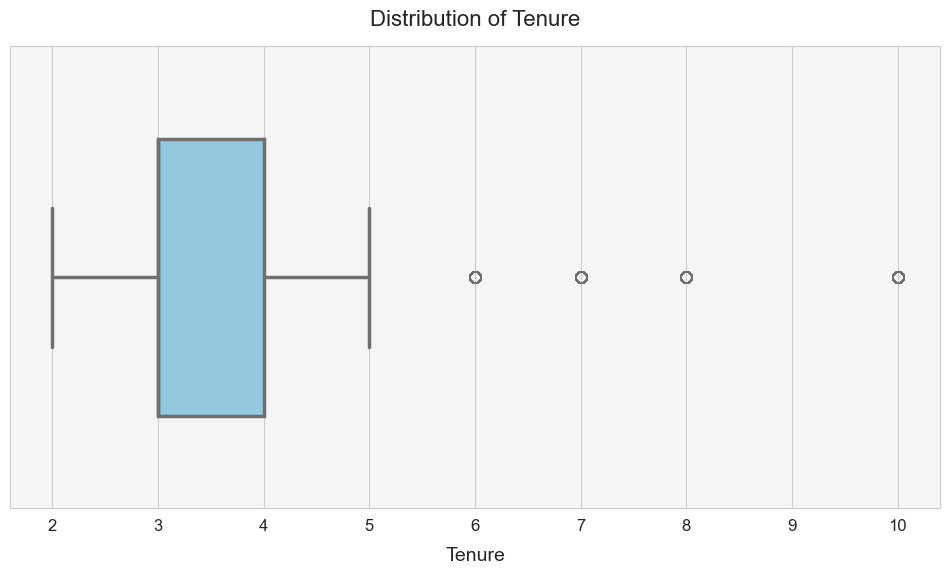

In [11]:
# Checking for Outliers in the 'tenure' Column Using a Boxplot


# Set the style for better aesthetics
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x=df_clean['tenure'], color='skyblue', fliersize=8, linewidth=2.5, width=0.6)

# Enhance the plot aesthetics
plt.xlabel('Tenure', fontsize=14, labelpad=10)
plt.title('Distribution of Tenure', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a background color
plt.gca().set_facecolor('#f5f5f5')

# Show the plot
plt.show()

The 'tenure' column reveals a few outliers, indicating variability in employee duration. Further analysis is warranted to understand and address these anomalies.

In [12]:
# Determine the number of rows containing outliers

# Define threshold for outliers (e.g., outside 1.5 times the interquartile range)
threshold = 1.5

# Calculate the interquartile range (IQR)
q1 = df_clean["tenure"].quantile(0.25)  # First quartile (25th percentile)
q3 = df_clean["tenure"].quantile(0.75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - threshold * iqr  # Lower bound for outliers
upper_bound = q3 + threshold * iqr  # Upper bound for outliers

# Count the number of rows containing outliers
# Rows with 'tenure' values less than the lower bound or greater than the upper bound are considered outliers
outliers_count = df_clean[(df_clean["tenure"] < lower_bound) | (df_clean["tenure"] > upper_bound)].shape[0]

# Display the number of rows containing outliers
print("Number of rows containing outliers in tenure:", outliers_count)



Number of rows containing outliers in tenure: 824


Certain models are more sensitive to outliers than others. When you begin model building, carefully consider whether to remove outliers based on the specific type of model you choose. This step can significantly impact your model's performance and accuracy

Number of employees who left vs. stayed:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left vs. stayed:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


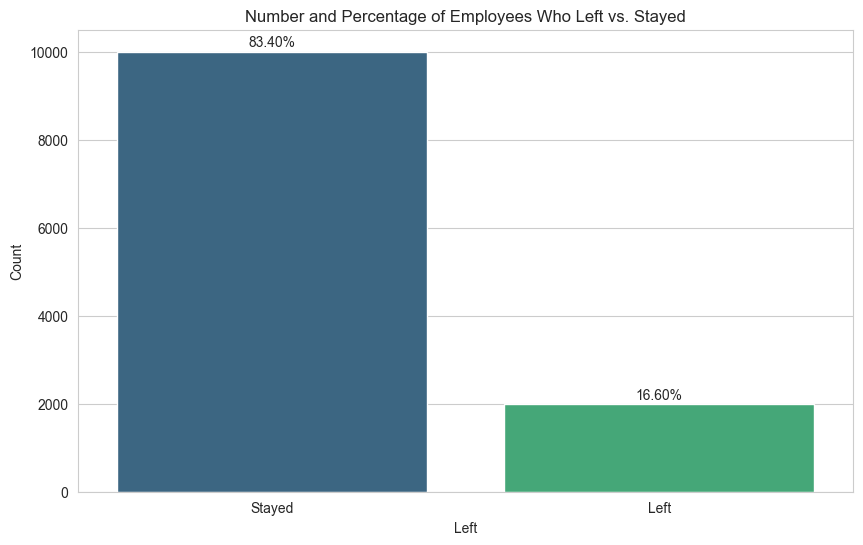

In [13]:
# Get the counts of people who left vs. stayed
# 'left' column likely indicates whether an employee left the company (1) or stayed (0)
left_counts = df_clean['left'].value_counts()

# Get the percentages of people who left vs. stayed
# Normalize=True calculates the relative frequencies, then multiply by 100 for percentage
left_percentages = df_clean['left'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who left vs. stayed:")
print(left_counts)
print("\nPercentage of employees who left vs. stayed:")
print(left_percentages)

# Create a DataFrame for visualization
left_df = pd.DataFrame({
    'Count': left_counts,
    'Percentage': left_percentages
}).reset_index()

# Rename the index column for clarity
left_df.columns = ['Left', 'Count', 'Percentage']

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Left', y='Count', data=left_df, palette='viridis', hue='Left', dodge=False, legend=False)

# Annotate the percentages on the bars
for i, row in left_df.iterrows():
    ax.text(i, row['Count'] + 50, f'{row["Percentage"]:.2f}%', ha='center', va='bottom')

ax.set_xlabel("Left")
ax.set_ylabel("Count")
ax.set_title("Number and Percentage of Employees Who Left vs. Stayed")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Stayed", "Left"])

plt.show()



From the result, we can observe  the following
* The number of employees who stayed in the company is 10,000
* The number of employees who left the company is 1 991
* The percentage of employees who stayed in the company is approximately 83.4%
* The percentage of employees who left the company is approximately 16.6%

<div style="text-align: center; position: relative;">
    <hr style="border:0; background-color:#2E8B57; height:2px; width:90%; margin:10px auto;"> <!-- Sea Green color -->
    <span style="position: absolute; left: 50%; top: -12px; background-color: black; padding: 0 10px; transform: translateX(-50%);">
        Step 3: Data Visualization
</div>

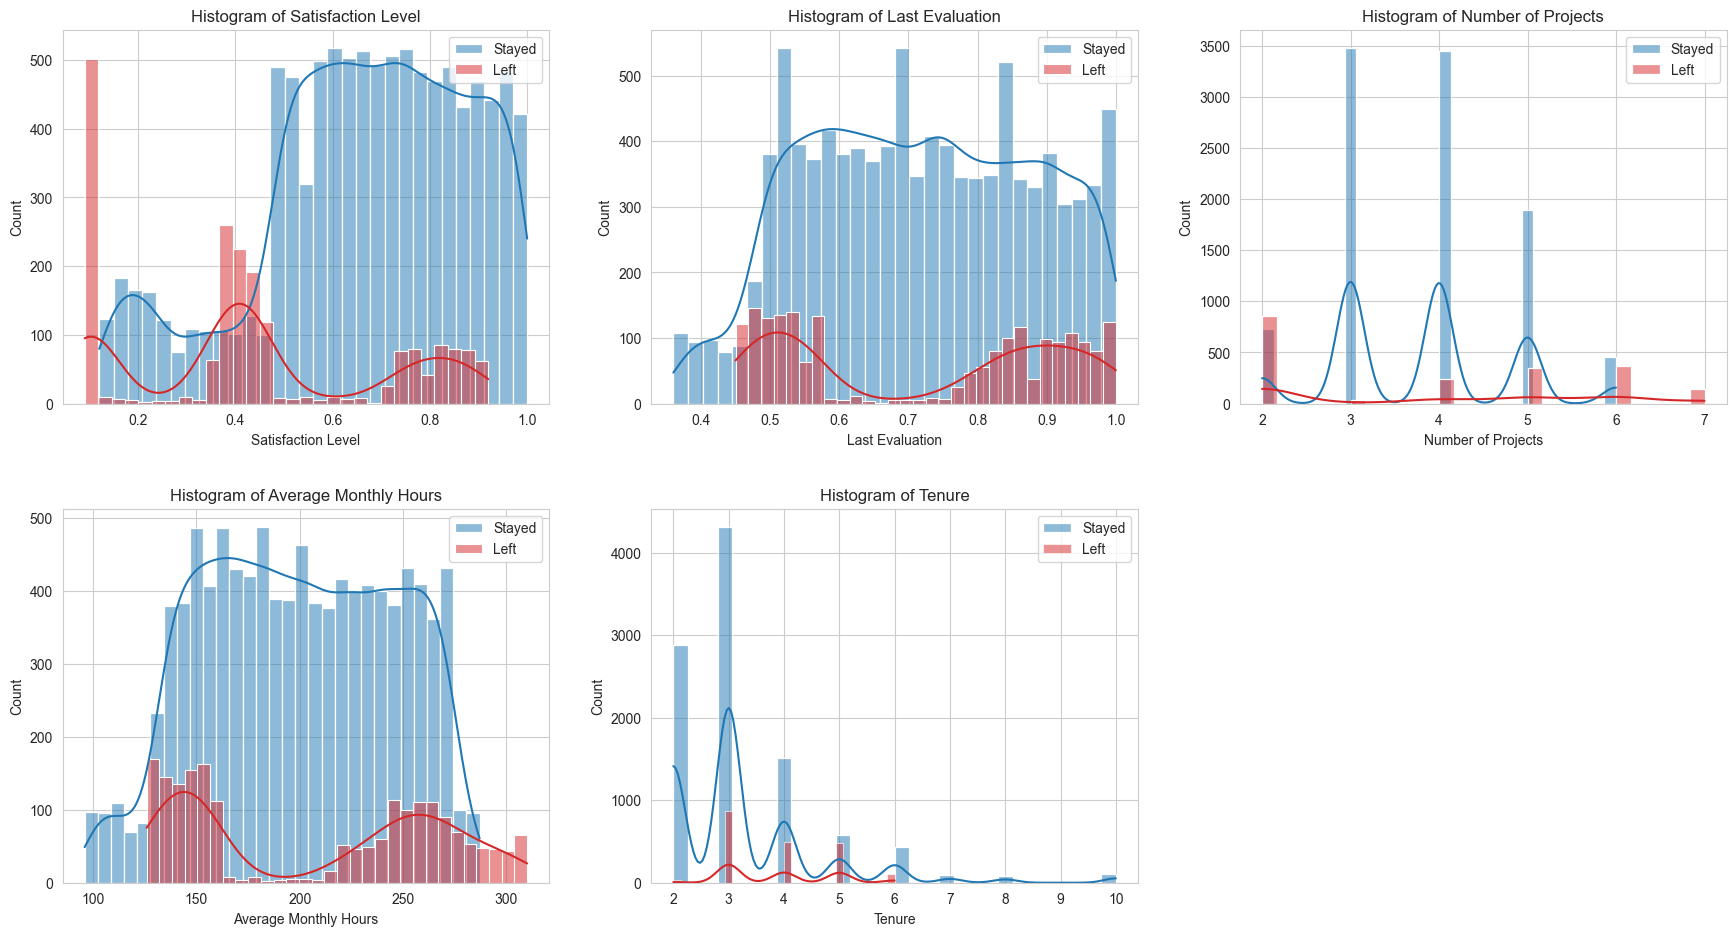

In [14]:
# Set the overall figure size
plt.figure(figsize=(18, 10))

# Define a color palette
palette = {
    'Stayed': '#1f77b4',  # Blue
    'Left': '#d62728'     # Red
}

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(df_clean[df_clean['left'] == 0]['satisfaction_level'], kde=True, color=palette['Stayed'], label='Stayed', bins=30)
sns.histplot(df_clean[df_clean['left'] == 1]['satisfaction_level'], kde=True, color=palette['Left'], label='Left', bins=30)
plt.xlabel('Satisfaction Level')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Histogram of Satisfaction Level')  # Plot title
plt.legend(loc='upper right')  # Legend location

# Plot histogram for last_evaluation
plt.subplot(2, 3, 2)
sns.histplot(df_clean[df_clean['left'] == 0]['last_evaluation'], kde=True, color=palette['Stayed'], label='Stayed', bins=30)
sns.histplot(df_clean[df_clean['left'] == 1]['last_evaluation'], kde=True, color=palette['Left'], label='Left', bins=30)
plt.xlabel('Last Evaluation')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Histogram of Last Evaluation')  # Plot title
plt.legend(loc='upper right')  # Legend location

# Plot histogram for number_project
plt.subplot(2, 3, 3)
sns.histplot(df_clean[df_clean['left'] == 0]['number_project'], kde=True, color=palette['Stayed'], label='Stayed', bins=30)
sns.histplot(df_clean[df_clean['left'] == 1]['number_project'], kde=True, color=palette['Left'], label='Left', bins=30)
plt.xlabel('Number of Projects')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Histogram of Number of Projects')  # Plot title
plt.legend(loc='upper right')  # Legend location

# Plot histogram for average_monthly_hours
plt.subplot(2, 3, 4)
sns.histplot(df_clean[df_clean['left'] == 0]['average_monthly_hours'], kde=True, color=palette['Stayed'], label='Stayed', bins=30)
sns.histplot(df_clean[df_clean['left'] == 1]['average_monthly_hours'], kde=True, color=palette['Left'], label='Left', bins=30)
plt.xlabel('Average Monthly Hours')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Histogram of Average Monthly Hours')  # Plot title
plt.legend(loc='upper right')  # Legend location

# Plot histogram for tenure
plt.subplot(2, 3, 5)
sns.histplot(df_clean[df_clean['left'] == 0]['tenure'], kde=True, color=palette['Stayed'], label='Stayed', bins=30)
sns.histplot(df_clean[df_clean['left'] == 1]['tenure'], kde=True, color=palette['Left'], label='Left', bins=30)
plt.xlabel('Tenure')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Histogram of Tenure')  # Plot title
plt.legend(loc='upper right')  # Legend location

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout(pad=3.0)

# Display the plot
plt.show()


C:\Users\murta\AppData\Local\Temp\ipykernel_27408\3655362791.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



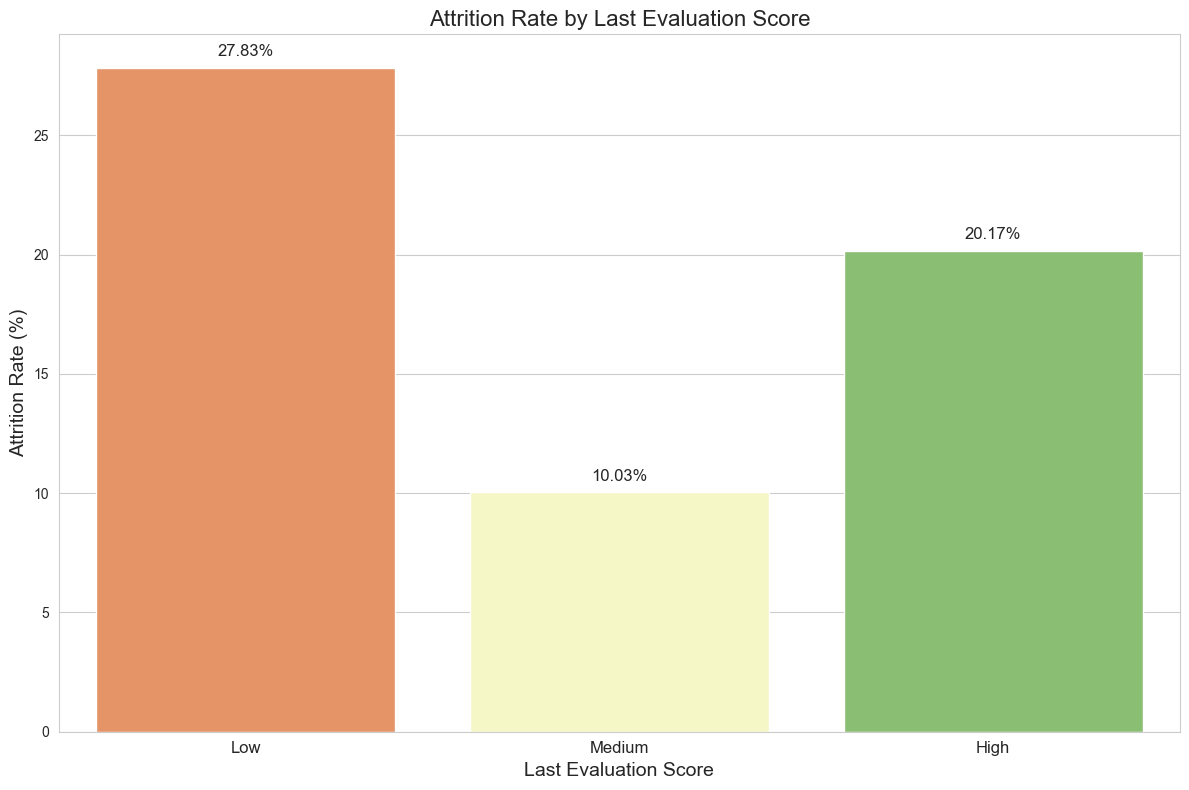

In [15]:
# Create bins for different ranges of last evaluation scores
# 'Low' for scores between 0 and 0.5, 'Medium' for scores between 0.5 and 0.75, 'High' for scores between 0.75 and 1
bins = pd.cut(df_clean['last_evaluation'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Calculate the attrition rate for each bin
# Group by the bins and calculate the mean attrition rate, then multiply by 100 to get the percentage
attrition_rate = df_clean.groupby(bins)['left'].mean() * 100

# Create the bar plot for attrition rates by last evaluation score
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='RdYlGn', hue=attrition_rate.index, dodge=False, legend=False)  # Use a color palette from Red to Green
plt.xlabel('Last Evaluation Score', fontsize=14)  # X-axis label with increased font size
plt.ylabel('Attrition Rate (%)', fontsize=14)  # Y-axis label with increased font size
plt.title('Attrition Rate by Last Evaluation Score', fontsize=16)  # Plot title with increased font size

# Add count labels to the bars
for i, value in enumerate(attrition_rate.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12)  # Annotate bars with attrition rate percentages

# Rotate x-axis labels for readability
plt.xticks(rotation=0, fontsize=12)  # Rotate labels and increase font size for readability

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


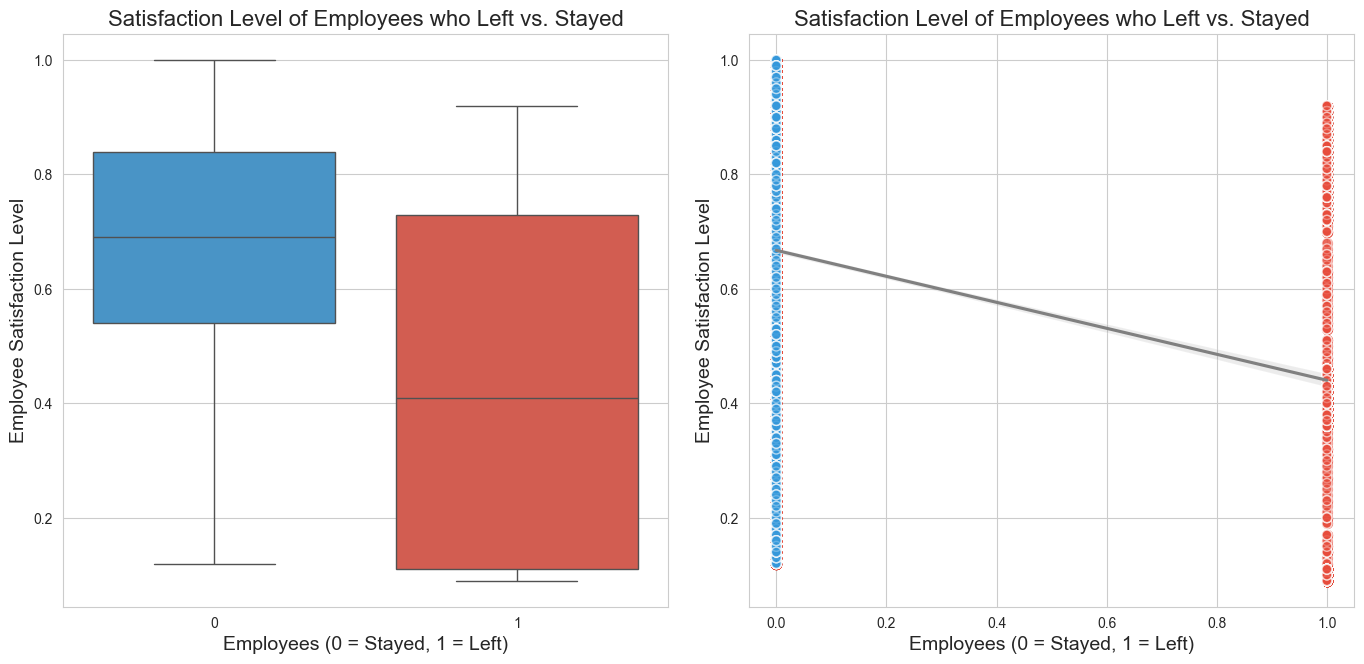

In [16]:
# Set the overall figure size
plt.figure(figsize=(14, 7))

# Box plot to visualize satisfaction levels of employees who left vs stayed
plt.subplot(1, 2, 1)
# Use a boxplot to show the distribution of satisfaction levels for employees who left vs stayed
sns.boxplot(x='left', y='satisfaction_level', data=df_clean, hue='left', palette={0: '#3498db', 1: '#e74c3c'}, dodge=False, legend=False)
plt.xlabel('Employees (0 = Stayed, 1 = Left)', fontsize=14)  # X-axis label with increased font size
plt.ylabel('Employee Satisfaction Level', fontsize=14)  # Y-axis label with increased font size
plt.title('Satisfaction Level of Employees who Left vs. Stayed', fontsize=16)  # Plot title with increased font size

# Regression plot to examine the relationship between satisfaction level and employee attrition
plt.subplot(1, 2, 2)
# Create a regression plot to see if there's a linear relationship between satisfaction level and whether employees left
sns.regplot(x='left', y='satisfaction_level', data=df_clean, scatter_kws={'s': 50, 'alpha': 0.6, 'color': '#e74c3c'}, line_kws={'color': 'gray'}, marker='o')
# Scatter plot with colors based on whether employees left or stayed
plt.scatter(x=df_clean['left'], y=df_clean['satisfaction_level'], c=df_clean['left'].map({0: '#3498db', 1: '#e74c3c'}), alpha=0.6, s=50, edgecolor='w', marker='o')
plt.xlabel('Employees (0 = Stayed, 1 = Left)', fontsize=14)  # X-axis label with increased font size
plt.ylabel('Employee Satisfaction Level', fontsize=14)  # Y-axis label with increased font size
plt.title('Satisfaction Level of Employees who Left vs. Stayed', fontsize=16)  # Plot title with increased font size

# Adjust layout to prevent overlap and improve spacing
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()

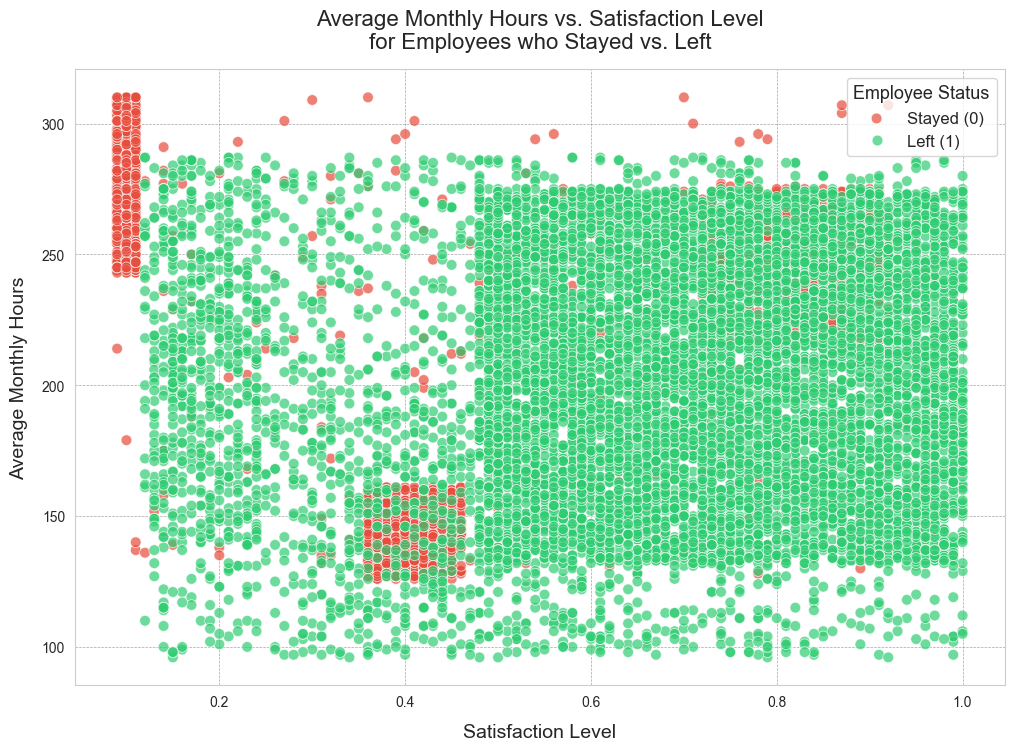

In [17]:
# Set the overall figure size
plt.figure(figsize=(12, 8))

# Create scatter plot comparing employees who stayed versus those who left
# 'hue' differentiates the colors based on the 'left' column (0: Stayed, 1: Left)
sns.scatterplot(
    x='satisfaction_level', 
    y='average_monthly_hours', 
    hue='left', 
    data=df_clean, 
    palette={0: '#2ecc71', 1: '#e74c3c'},  # Green for stayed, red for left
    alpha=0.7,  # Set transparency for points
    edgecolor='w',  # White edge color for better contrast
    s=60  # Increase marker size for better visibility
)

# Set labels for x-axis and y-axis
plt.xlabel('Satisfaction Level', fontsize=14, labelpad=10)
plt.ylabel('Average Monthly Hours', fontsize=14, labelpad=10)

# Set the title of the plot
plt.title('Average Monthly Hours vs. Satisfaction Level\nfor Employees who Stayed vs. Left', fontsize=16, pad=15)

# Enhance the legend
plt.legend(title='Employee Status', labels=['Stayed (0)', 'Left (1)'], title_fontsize='13', fontsize='12')

# Customize the grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Set the background color
plt.gca().set_facecolor('#ffffff')  # Change background to white for clarity

# Display the plot
plt.show()

c:\Users\murta\OneDrive\Desktop\ML&DE\second-semester\Introduction ML\Home work\ML\Google Advanced data\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

c:\Users\murta\OneDrive\Desktop\ML&DE\second-semester\Introduction ML\Home work\ML\Google Advanced data\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



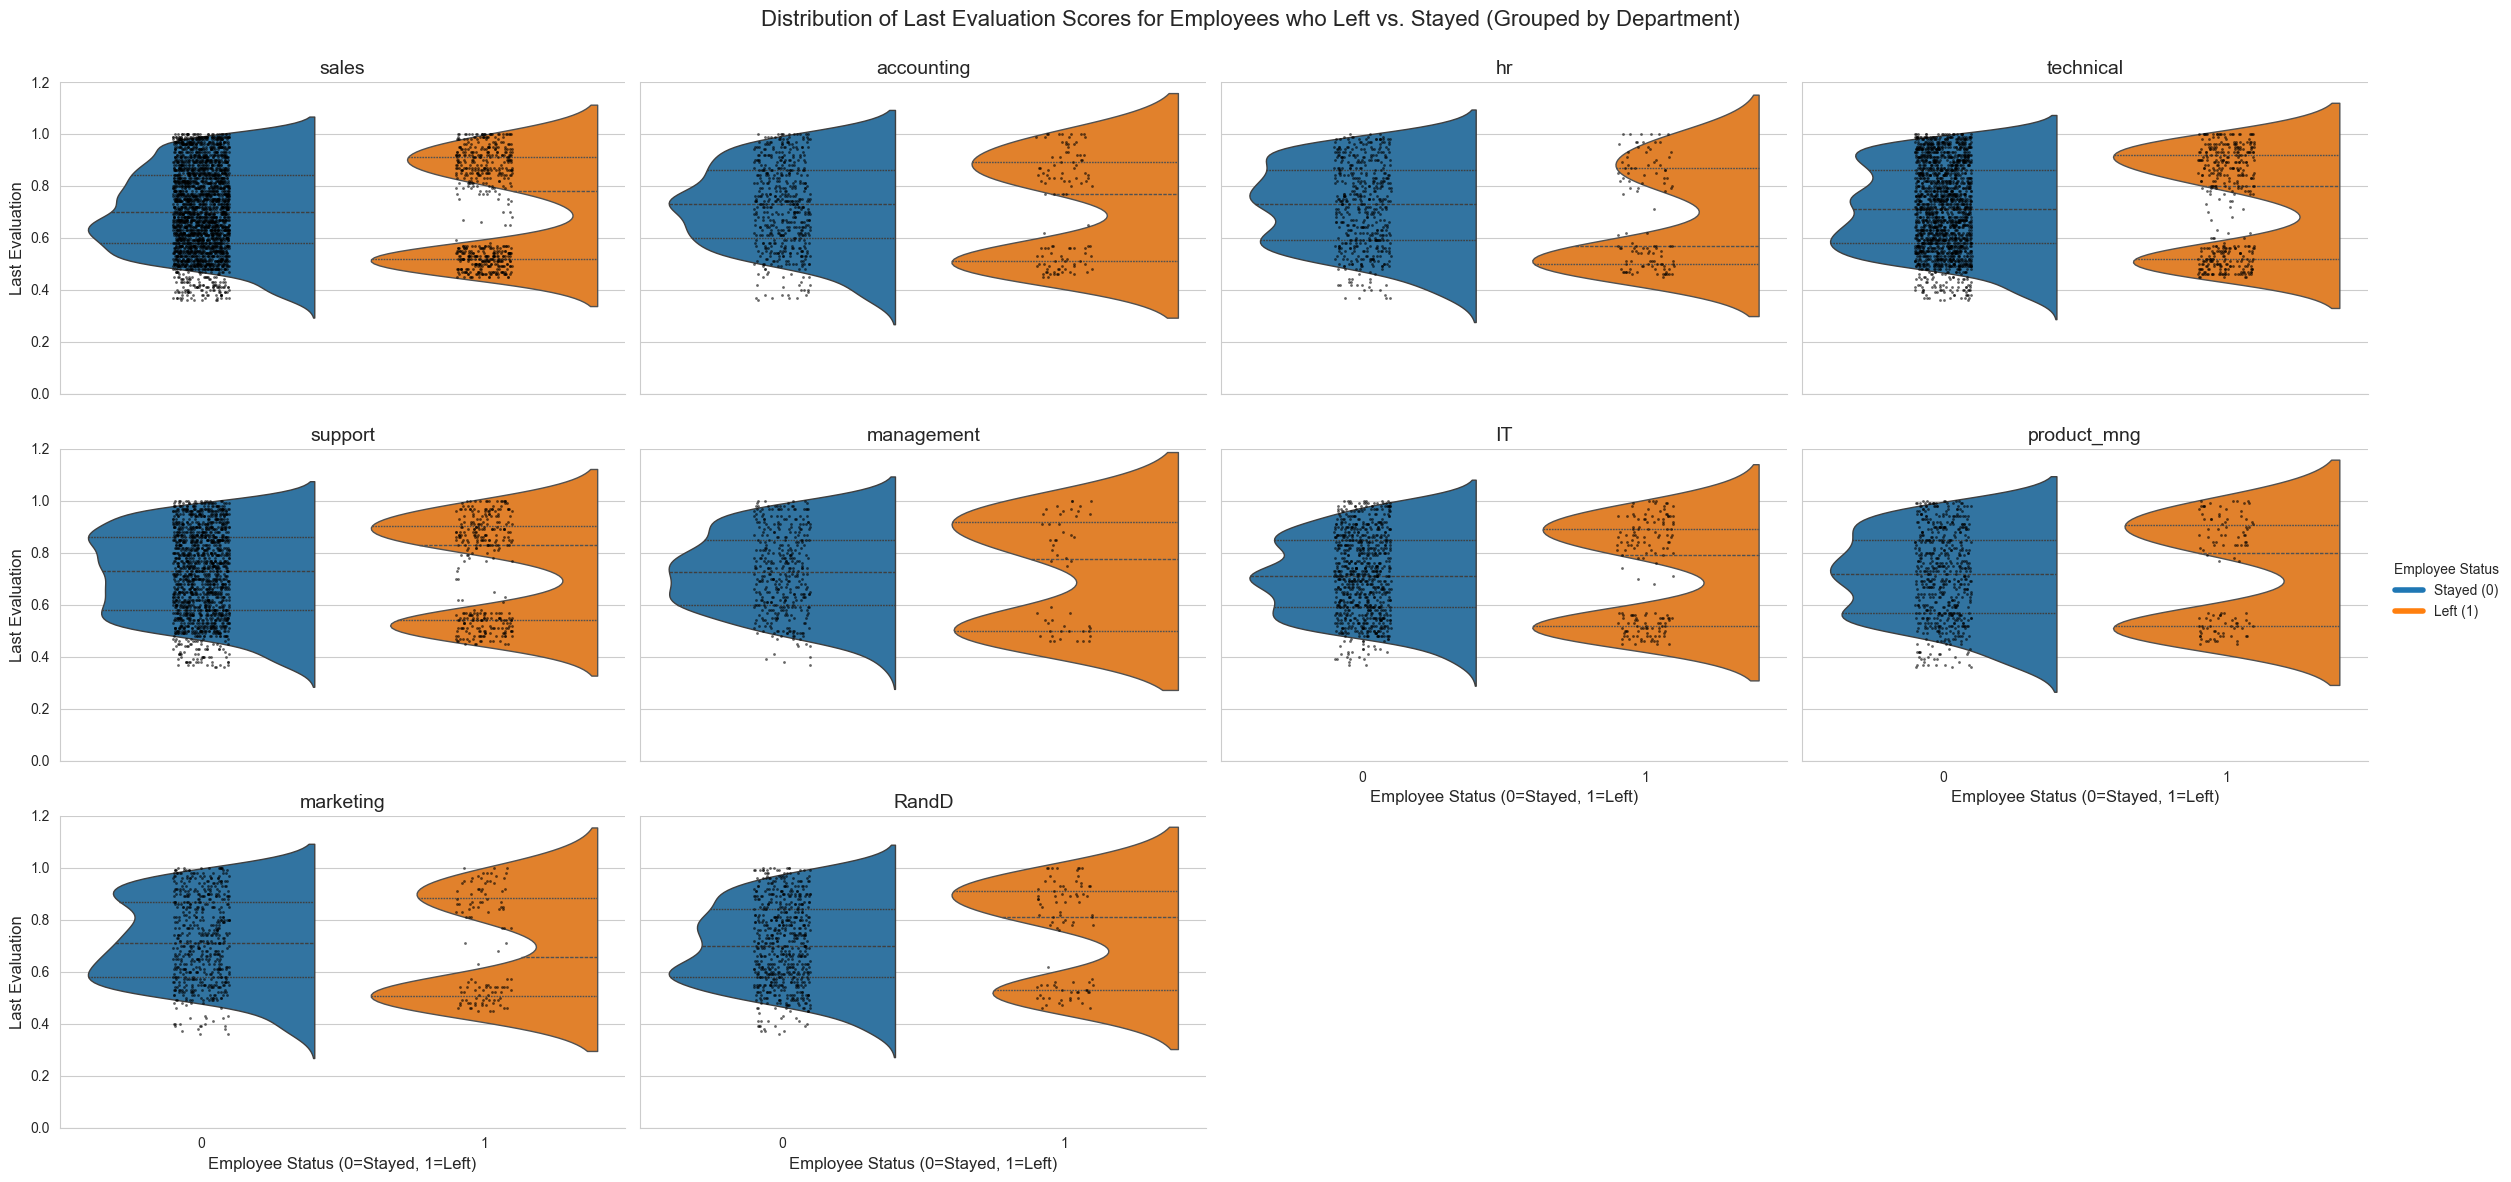

In [18]:
# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create a FacetGrid for different departments
g = sns.FacetGrid(df_clean, col="department", hue="left", col_wrap=4, height=4, aspect=1.5, palette={0: '#1f77b4', 1: '#ff7f0e'}, sharey=True)

# Map the violinplot to each facet and add jittered points for better visibility
g.map(sns.violinplot, "left", "last_evaluation", split=True, inner="quartile", linewidth=1)
g.map(sns.stripplot, "left", "last_evaluation", jitter=True, size=2, color="k", alpha=0.6)

# Adjust y-axis limits for better alignment
for ax in g.axes.flat:
    ax.set_ylim(0, 1.2)

# Create custom legend elements to match the violin plot colors
legend_elements = [
    plt.Line2D([0], [0], color='#1f77b4', lw=4, label='Stayed (0)'),
    plt.Line2D([0], [0], color='#ff7f0e', lw=4, label='Left (1)'),
]

# Add the custom legend to the plot
g.add_legend(handles=legend_elements, title='Employee Status')

# Set titles and labels
g.set_titles(col_template="{col_name}", size=14)
g.set_axis_labels("Employee Status (0=Stayed, 1=Left)", "Last Evaluation", fontsize=12)

# Adjust the layout
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Distribution of Last Evaluation Scores for Employees who Left vs. Stayed (Grouped by Department)', fontsize=16)

# Show the plot
plt.show()

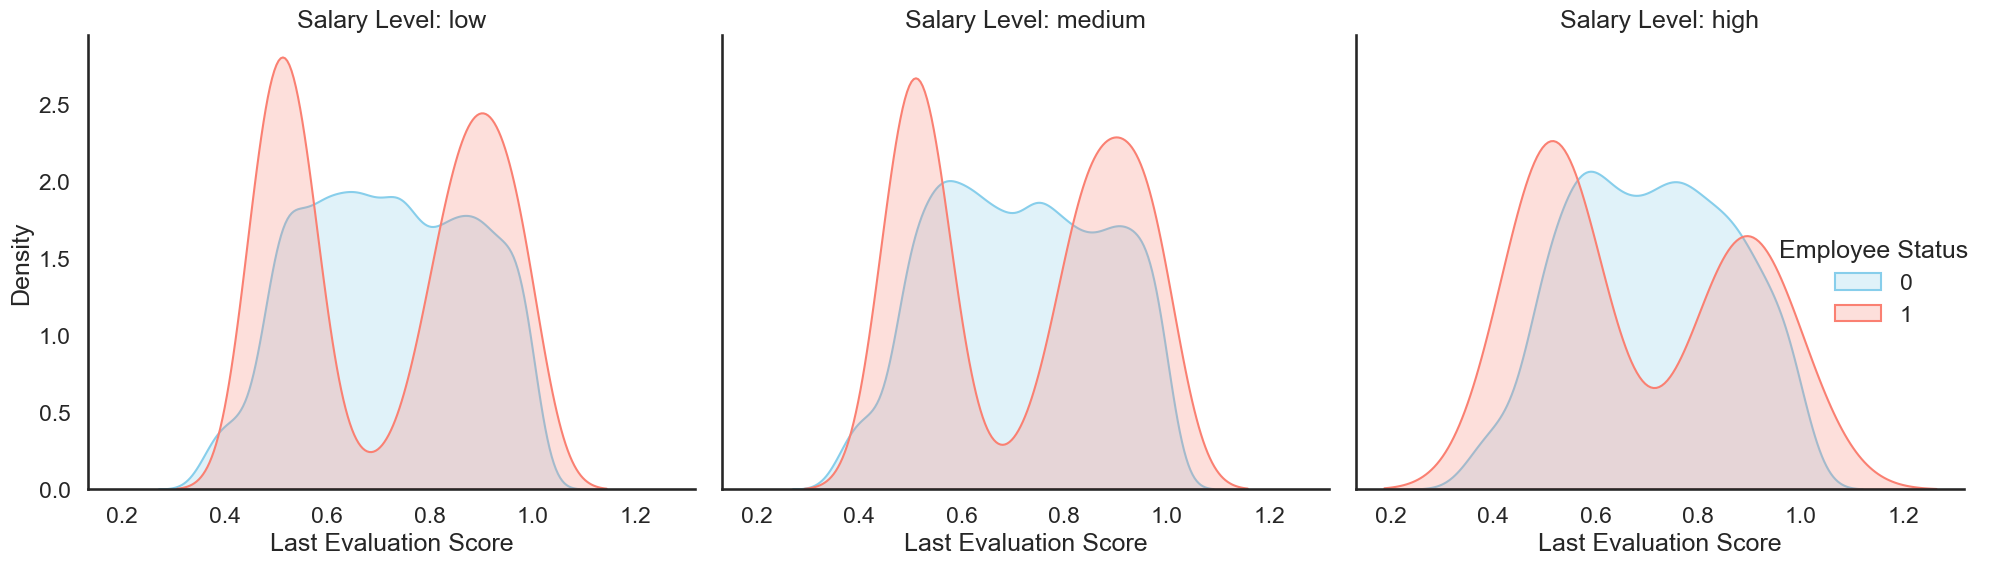

In [19]:

# Set the aesthetic style of the plots
sns.set(style="white", context="talk")

# Create a FacetGrid to separate stayed and left employees
g = sns.FacetGrid(df_clean, col="salary", hue="left", palette={0: 'skyblue', 1: 'salmon'}, height=6, aspect=1)

# Map a KDE plot to each subplot
g.map(sns.kdeplot, 'last_evaluation', fill=True)

# Add a legend and titles
g.add_legend(title="Employee Status")
g.set_titles("Salary Level: {col_name}")

# Set the axis labels
g.set_axis_labels("Last Evaluation Score", "Density")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

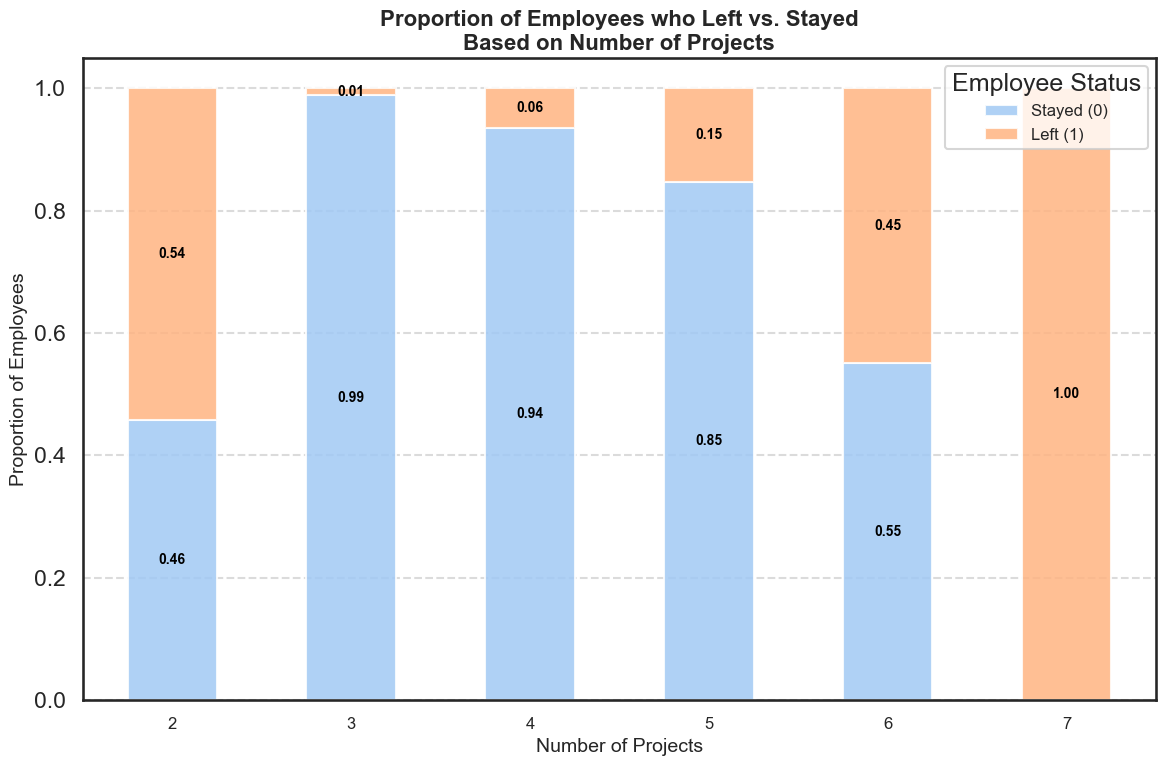

In [20]:
plt.figure(figsize=(12, 8))
# Calculate the proportion of employees who left versus stayed based on project counts
project_counts = df_clean.groupby(['number_project', 'left']).size().unstack(fill_value=0)
project_counts['Total'] = project_counts.sum(axis=1)
project_proportions = project_counts.div(project_counts['Total'], axis=0)

# Define modern colors
colors = sns.color_palette("pastel")

# Create the stacked bar plot
ax = project_proportions[[0, 1]].plot(kind='bar', stacked=True, color=colors, alpha=0.85, figsize=(12, 8))

# Set labels and title
ax.set_xlabel('Number of Projects', fontsize=14)
ax.set_ylabel('Proportion of Employees', fontsize=14)
ax.set_title('Proportion of Employees who Left vs. Stayed\nBased on Number of Projects', fontsize=16, weight='bold')

# Customize legend
ax.legend(title='Employee Status', labels=['Stayed (0)', 'Left (1)'], loc='upper right', fontsize=12)

# Add annotations for clarity
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='black', weight='bold')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\murta\AppData\Local\Temp\ipykernel_27408\2246058628.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



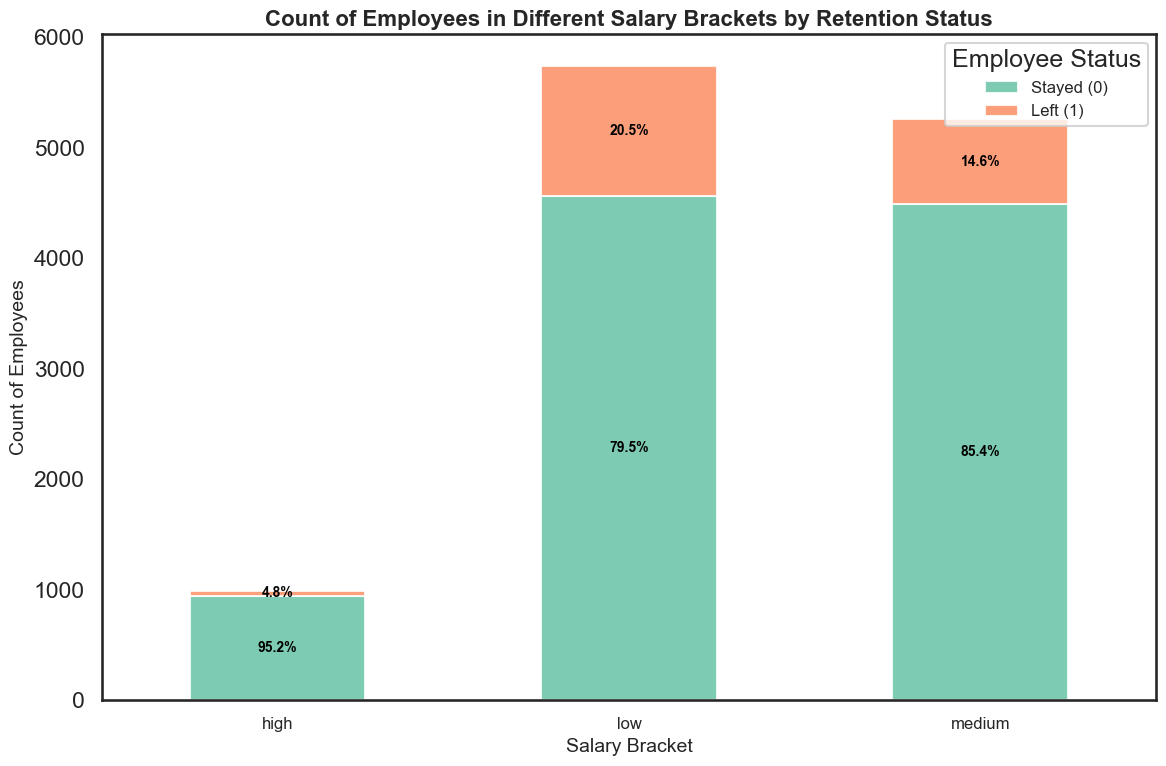

In [21]:
# Count the number of employees in each salary bracket
salary_count = df_clean.groupby(['salary', 'left']).size().unstack(fill_value=0)

# Set the colors for employees who stayed and left
colors = sns.color_palette("Set2")

# Create the grouped bar plot
ax = salary_count.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8), alpha=0.85)

# Add labels, title, and legend
plt.xlabel('Salary Bracket', fontsize=14)
plt.ylabel('Count of Employees', fontsize=14)
plt.title('Count of Employees in Different Salary Brackets by Retention Status', fontsize=16, weight='bold')
plt.legend(title='Employee Status', labels=['Stayed (0)', 'Left (1)'], loc='upper right', fontsize=12)

# Add percentage labels on top of each bar
total_counts = salary_count.sum(axis=1)
for i, (index, row) in enumerate(salary_count.iterrows()):
    for j, count in enumerate(row):
        if count > 0:  # To avoid division by zero or plotting zero percentages
            percentage = count / total_counts[i] * 100
            plt.text(i, row[:j].sum() + count / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='black', weight='bold')

# Add gridlines alpha=0.7)
 
# Improve x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

The number of employees in low ans medium salary bracket who left the company is significantly higher than the number of employees in the high salary bracket. 

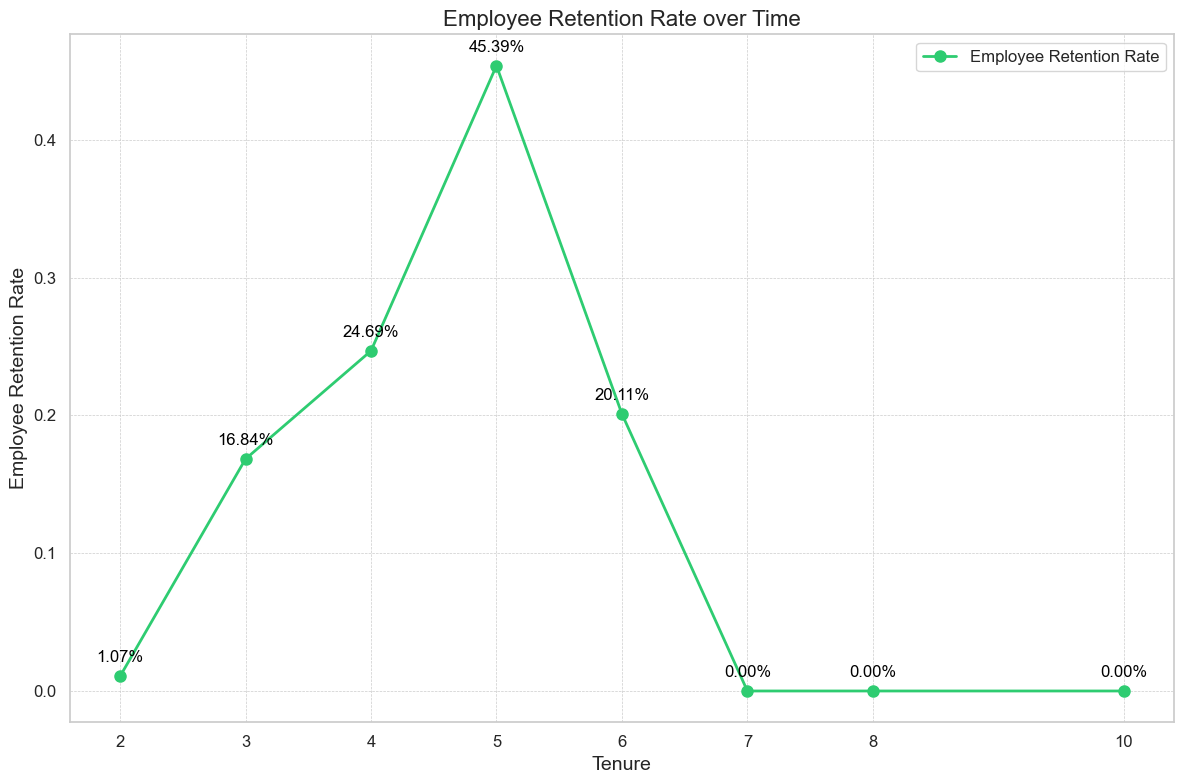

In [22]:
# Set the style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Group the data by tenure and calculate the turnover rate
turnover_rate = df_clean.groupby("tenure")["left"].mean()

# Create the line plot
turnover_rate.plot(marker="o", linestyle="-", color="#2ecc71", markersize=8, linewidth=2)

# Customize the axes and title
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Employee Retention Rate', fontsize=14)
plt.title('Employee Retention Rate over Time', fontsize=16)
plt.xticks(ticks=turnover_rate.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize the legend
plt.legend(['Employee Retention Rate'], fontsize=12, loc='upper right')

# Annotate each data point with its turnover rate
for x, y in zip(turnover_rate.index, turnover_rate.values):
    plt.annotate(f'{y:.2%}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=12, color='black')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

The trend line in the image shows that the retention rate for employees with 2-3 years of experience is about 1.07% - 16.84%, while the retention rate for employees with more than 3 years of experience goes higher. And the number hits the highest on 5th year.



<Figure size 2400x1400 with 0 Axes>

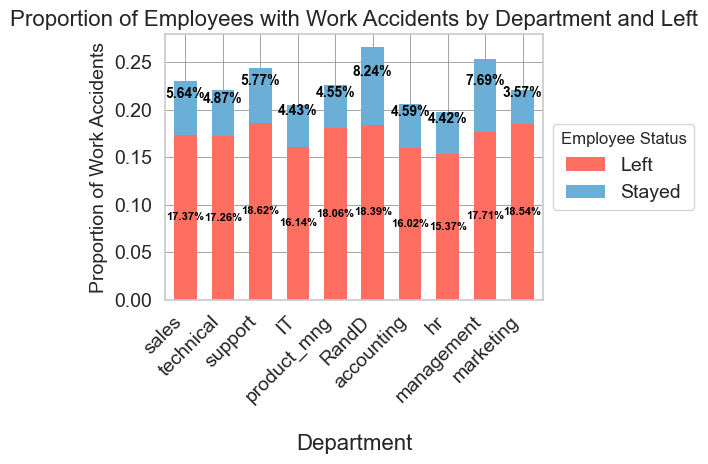

In [23]:
# Set a clean and modern style
sns.set(style="whitegrid")

# Create the figure with a larger size
plt.figure(figsize=(24, 14))

# Group the data by department and left, and calculate the proportion of work accidents
work_accident_prop = df_clean.groupby(["department", "left"])["work_accident"].mean().unstack()

# Set the order of departments
department_order = ["sales", "technical", "support", "IT", "product_mng", "RandD", "accounting", "hr", "management", "marketing"]
work_accident_prop = work_accident_prop.reindex(department_order)

# Define custom color palette
colors = ['#FF6F61', '#6BAED6']

# Create the grouped bar plot with adjusted bar width and spacing
ax = work_accident_prop.plot(kind='bar', stacked=True, color=colors, width=0.6, edgecolor='none')

# Customize the axes and title
plt.xlabel('Department', fontsize=16, labelpad=20)
plt.ylabel('Proportion of Work Accidents', fontsize=14)
plt.title('Proportion of Employees with Work Accidents by Department and Left', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Customize the legend and move it to the upper right corner outside the plot
plt.legend(['Left', 'Stayed'], fontsize=14, title='Employee Status', loc='center left', bbox_to_anchor= (1, 0.5))

# Make the grid lines less prominent
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# Add the proportion labels for each bar with more vertical adjustment for readability
for i, department in enumerate(department_order):
    left_prop = work_accident_prop.loc[department, 1]
    stayed_prop = work_accident_prop.loc[department, 0]
    if not np.isnan(stayed_prop):  # Check if the value is not NaN
        plt.text(i, stayed_prop / 2, f'{stayed_prop:.2%}', ha='center', va='center', color='black', fontsize=8, fontweight='bold')
    if not np.isnan(left_prop):  # Check if the value is not NaN
        plt.text(i, stayed_prop + left_prop / 2 + 0.015, f'{left_prop:.2%}', ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

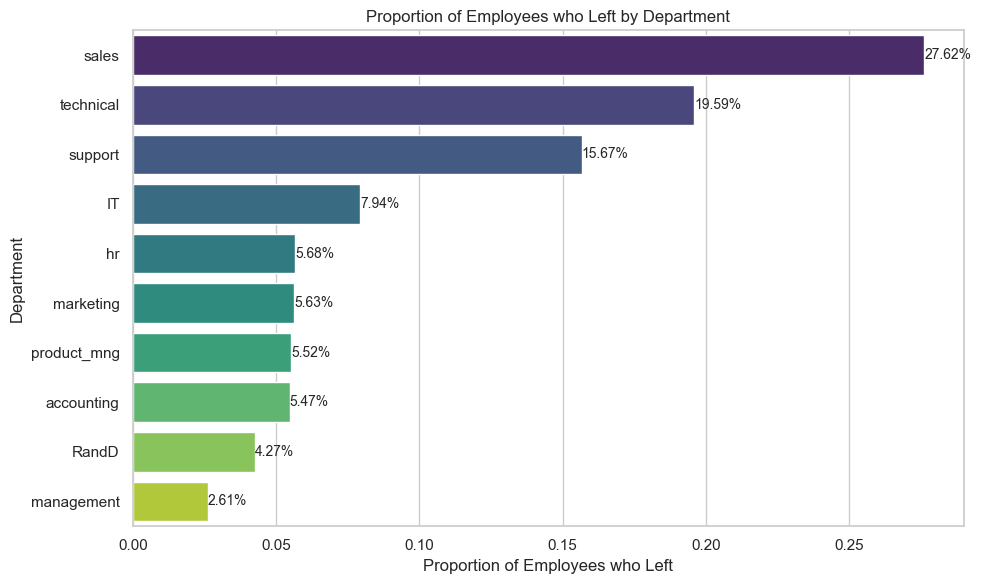

In [24]:
# Calculate the proportion of employees who left in each department
left_by_department = df_clean[df_clean['left'] == 1]['department'].value_counts(normalize=True)

# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, hue=left_by_department.index, palette=colors, dodge=False, legend=False)
plt.xlabel('Proportion of Employees who Left')
plt.ylabel('Department')
plt.title('Proportion of Employees who Left by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

The plot reveals that the Sales department experienced the highest proportion of employee departures, followed by the Technical and Support departments. In contrast, the Management department showed the highest retention rate, indicating the least number of employees leaving.

C:\Users\murta\AppData\Local\Temp\ipykernel_27408\3126770523.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




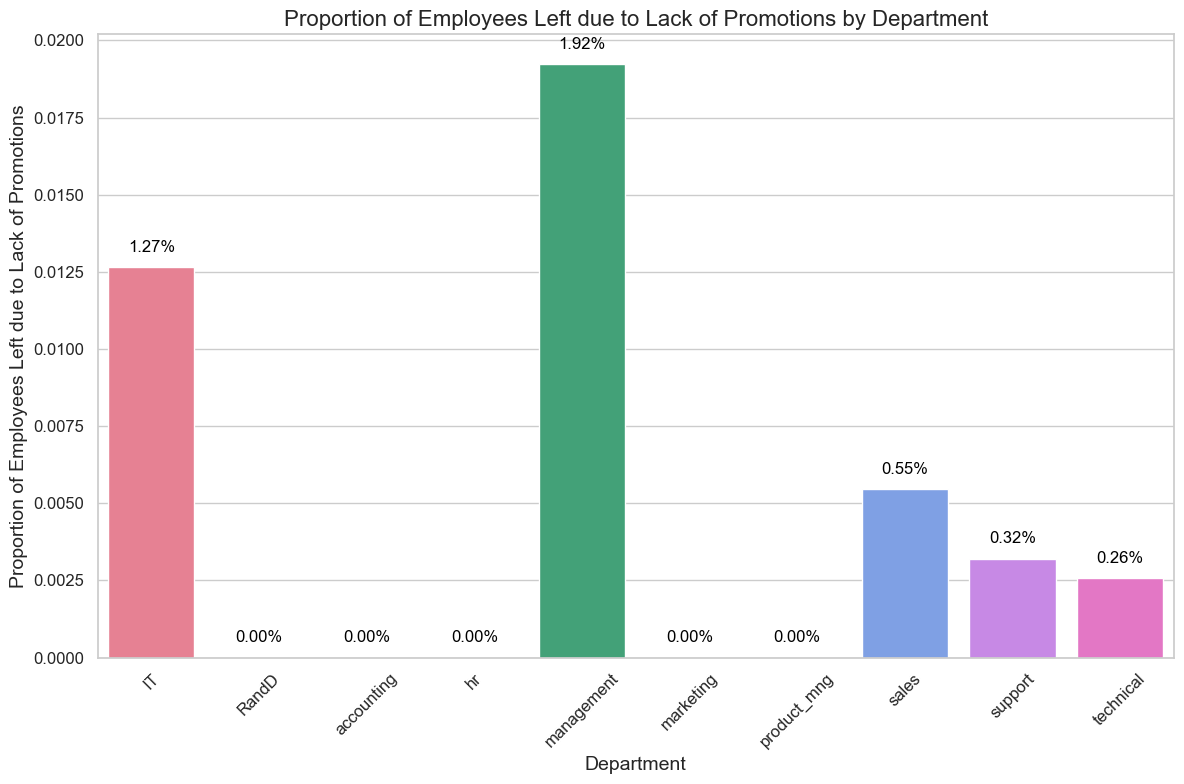

In [25]:
# Set the style for the plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Filter data for employees who left and group by department to calculate the proportion who left due to lack of promotions
promotion_prop = df_clean[df_clean['left'] == 1].groupby('department')['promotion_last_5years'].mean().reset_index()

# Set the order of departments
department_order = ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']

# Create the bar plot using Seaborn with enhanced colors
colors = sns.color_palette("husl", len(department_order))

sns.barplot(data=promotion_prop, x='department', y='promotion_last_5years', palette=colors)

plt.xlabel('Department', fontsize=14)
plt.ylabel('Proportion of Employees Left due to Lack of Promotions', fontsize=14)
plt.title('Proportion of Employees Left due to Lack of Promotions by Department', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add the proportion labels for each bar
for i, row in promotion_prop.iterrows():
    prop = row['promotion_last_5years']
    plt.text(i, prop + 0.0005, f'{prop:.2%}', ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

The above visual shows that the retention rate for employees who left the company due to lack of promotions impacts mostly Management team following IT team.

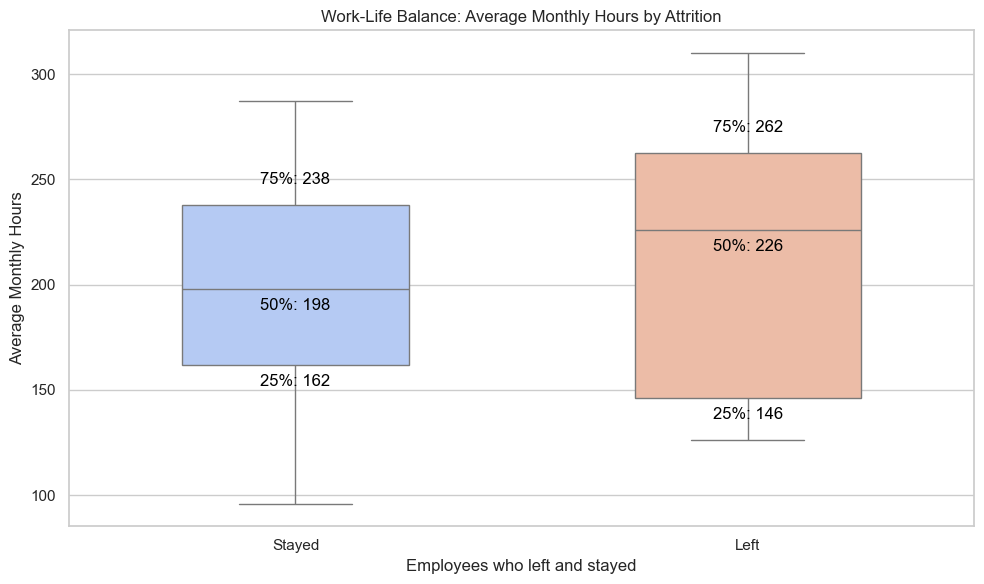

In [26]:
plt.figure(figsize=(10, 6))

# Create box plot with color-coded boxes using a better color palette
palette = sns.color_palette("coolwarm", 2)
sns.boxplot(x=df_clean['left'], y=df_clean['average_monthly_hours'], hue=df_clean['left'], palette=palette, width=0.5, dodge=False, legend=False)

# Set labels and title
plt.xlabel('Employees who left and stayed')
plt.ylabel('Average Monthly Hours')
plt.title('Work-Life Balance: Average Monthly Hours by Attrition')

# Add statistical annotations
stats = df_clean.groupby('left')['average_monthly_hours'].describe()
for i, label in enumerate(stats.index):
    plt.text(i, stats.loc[label, '75%'] + 10, f"75%: {int(stats.loc[label, '75%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '50%'] - 10, f"50%: {int(stats.loc[label, '50%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '25%'] - 10, f"25%: {int(stats.loc[label, '25%'])}", ha='center', color='black')

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

The box plot illustrates the work-life balance of employees by comparing the average monthly hours worked between those who left and those who stayed. Employees who left worked significantly more hours on average, with the 75th percentile reaching 262 hours, compared to 238 hours for those who stayed. This indicates that higher average monthly hours may be associated with employee attrition.

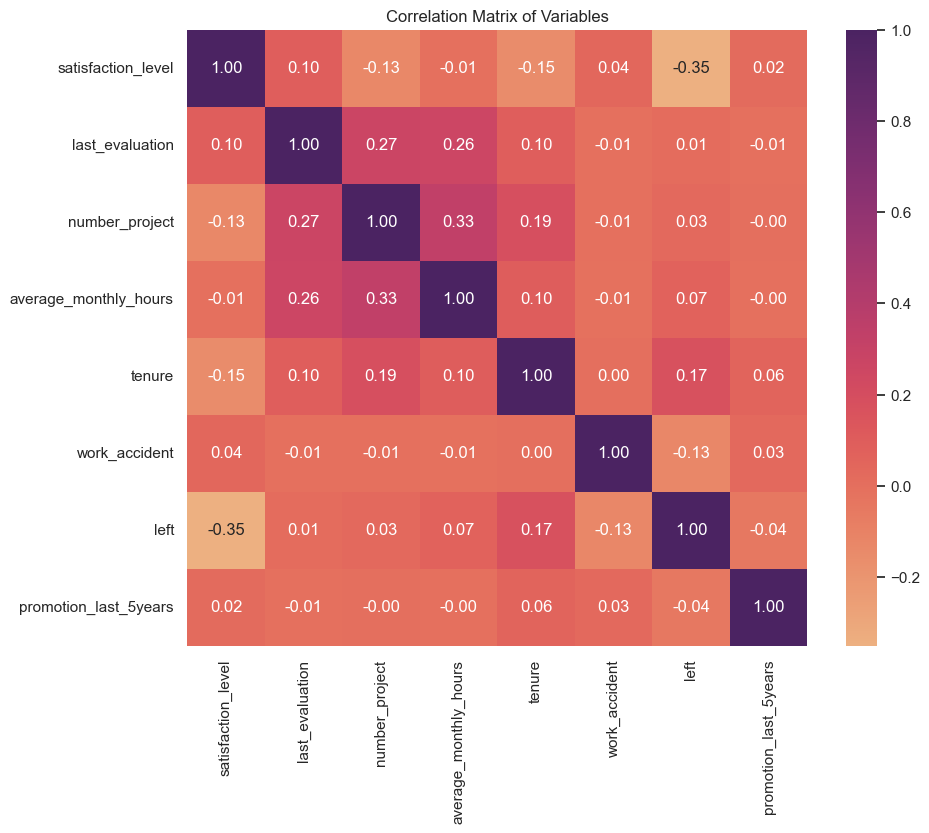

In [27]:
# we can generate a correlation matrix or heatmap to explore the relationships between variables and identify correlations of variables with employee retention.

# Compute the correlation using Seaborn
corr_matrix = df_clean.corr(numeric_only=True)
# create a heatmap using Seaborn 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap= "flare", fmt = ".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


From the correlation:

1- There is a moderate negative correlation between satisfaction_level and left (-0.35). This indicate that employees with lower satisfaction levels ate more likely to leave the company.
2- The number of projects and average_monthly_hours have a positive correlation (0.33), suggesting that employees who work on more project tend to have higher average monthly working hours. 
3- There is a positive corelation between last_evaluation and number_project(0.27) and last_evaluation and average_monthly_hours (0.26). This indicates that employees who on more projects and have more working hours tend
 to have higher last_evaluation scores.
4- Tenure and left have a weak negative correlation (-0.15), indicating that employees with longer tenure are slightly less likely to leave the company.

5-There is a weak negative correlation between tenure and average_monthly_hours(0.10), suggesting that employees with longer tenure slightly less likely to leave the company.
6- Work_accident and left have a weak negative correlation (-0.13), indicating that employees who have experienced a work 
accident are slightly less likely to leave the company.
 
7- There is a weak positive correlation between tenure and promotion_last_5years(0.06), suggestion that employees with longer tenure are slightly
 more likely to have received a promotion i the last 5 years.

In [28]:
# Copy the df_clean dataframe to df_model
df_model = df_clean.copy()

In [29]:
# check the balance od the dataset, so that the modeling can have better metrics.
# count the occurrence of each class in the "left" column
data_balance = df_model["left"].value_counts()

# calculate the percentage of each class

data_balanced_percentage = data_balance/len(df_model)*100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balanced_percentage)


Data Balance:
left
0    10000
1     1991
Name: count, dtype: int64

Data Balance Percentage:
left
0    83.39588
1    16.60412
Name: count, dtype: float64


In [30]:
# One-hot encode 'department'
df_model = pd.get_dummies(df_model, columns=['department'], drop_first=True)

# Ordinal encode 'salary'
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['salary'] = df_model['salary'].map(salary_mapping)

In [31]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [32]:
# Convert boolean columns to integers
df_model = df_model.astype({col: 'int' for col in df_model.select_dtypes('bool').columns})

In [33]:
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


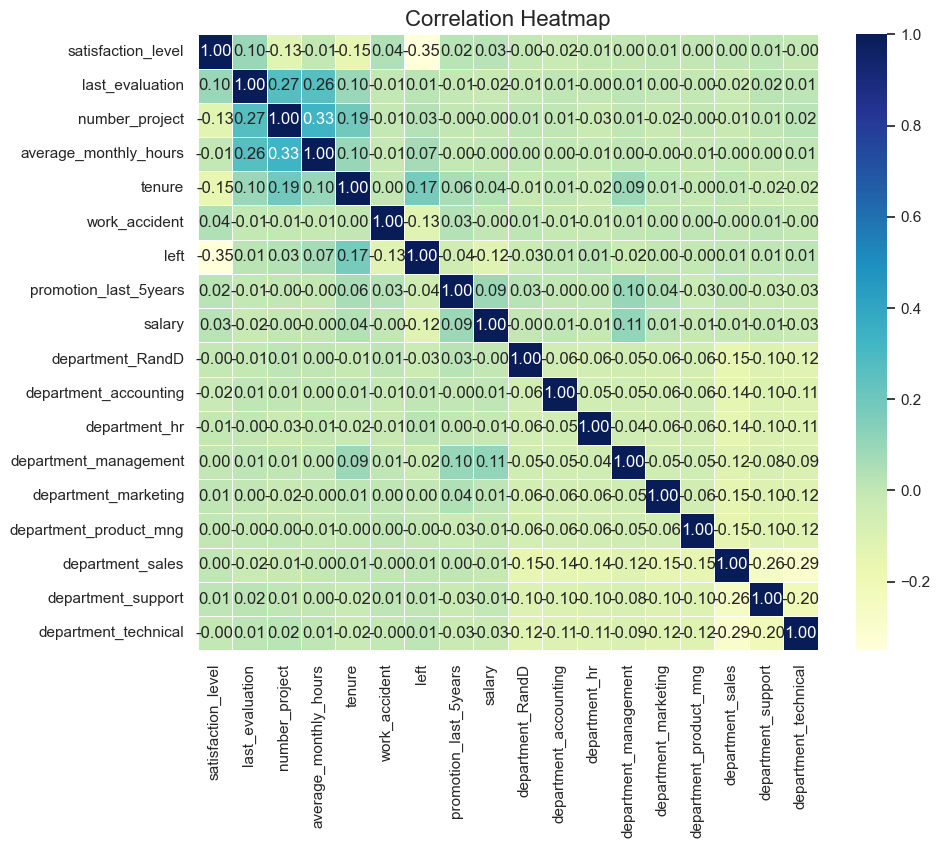

In [34]:
# Calculate the correlation matrix
corr_matrix = df_model.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap with green tones
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

In [35]:
#  Dropping the outliers from tenure column to proceed with the logistic regression,
# Calculate the first and third quartiles for 'tenure'
Q1 = df_model['tenure'].quantile(0.25)
Q3 = df_model['tenure'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

# Remove outliers from the tenure column
df_model = df_model[(df_model["tenure"]>= lower_bound) & (df_model["tenure"] <= upper_bound)]

df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Isolate the outcome variable "left" from the features
X = df_model.drop("left", axis=1) # Features (all columns except "left")
y = df_model["left"] # outcome variable "left"

# display the first few rows of the feature dataframe (x) and the outcome variables (y)
print("# Feature DataFrame (X):")
print(X.head())


# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0       0                 0   
2       4              0                      0       1                 0   
3       5              0                      0       0                 0   
4       3              0                      0       0                 0   
5       3              0                      0       0                 0   

   department_accounting 

In [37]:
print("\n -----------------------------------------------------------------")
print("# Outcome Variable (y):")
print(y.head())



 -----------------------------------------------------------------
# Outcome Variable (y):
0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64


Now we have the features dataframe(x) and outcome variable (y) ready for logistic regression modeling.

Now I will split the data into train and sets.

In [38]:
# split the data into training and testing sets, with stratification.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.3, stratify= y, random_state=42)

In [39]:
# Display the shape of the training and testing sets with additional formatting
print("Training Set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print("\nTesting Set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")


Training Set:
  X_train shape: (7816, 17)
  y_train shape: (7816,)

Testing Set:
  X_test shape: (3351, 17)
  y_test shape: (3351,)


<div style="text-align: center; position: relative;">
    <hr style="border:0; background-color:#2E8B57; height:2px; width:90%; margin:10px auto;"> <!-- Sea Green color -->
    <span style="position: absolute; left: 50%; top: -12px; background-color: black; padding: 0 10px; transform: translateX(-50%);">
        Step 4: Building Models: Logistic Regression Model
</div>

In [40]:
# Create a logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)


In [41]:
# Fit the model to the Training dataset.
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
#I use the trained logistic regression model to make predictions on the set
y_pred = log_reg_model.predict(X_test)

In [43]:
#Display the first few predicted values
print("Predicted values for the test set:")
y_pred[:10]

Predicted values for the test set:


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

Lets see how well the model can predict using a confusion matrix

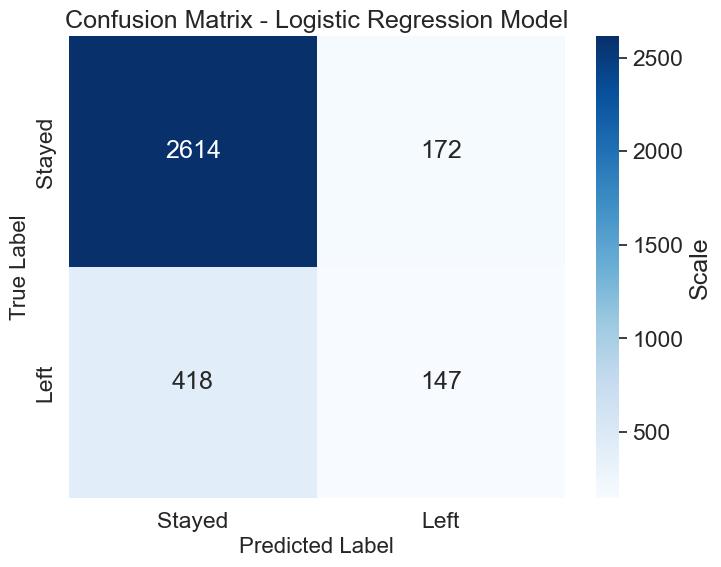

In [44]:
# Generate the confusion matrix
# Create a ConfusionMatrixDisplay object and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_title("Confusion Matrix - Logistic Regression Model", fontsize=18)
ax.set_xlabel("Predicted Label", fontsize=16)
ax.set_ylabel("True Label", fontsize=16)
ax.set_xticklabels(["Stayed", "Left"])
ax.set_yticklabels(["Stayed", "Left"])
plt.show()

In [45]:
# Below the interpretation of the values to understand the performance of the logistic regression model.

# True Positive (TP): The model correctly predicted 147 employees who actually left the company.
# True Negative (TN): The model correctly predicted 2614 employees who actually stayed in the company.
# False Positive (FP): The model incorrectly predicted 172 employees as leaving the company when they actually stayed (Type I error).
# False Negative (FN): The model incorrectly predicted 418 employees as staying in the company when they actually left (Type II error).

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])



In [47]:
# Display the evaluation metrics with better formatting
print("Evaluation Metrics: \n" + "-"*20)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC-ROC  : {roc_auc:.4f}")

Evaluation Metrics: 
--------------------
Accuracy : 0.8239
Precision: 0.4608
Recall   : 0.2602
F1-score : 0.3326
AUC-ROC  : 0.8808


In [48]:
#  Display the evaluation metrics with improved formatting
print("\nEvaluation Metrics\n" + "="*40)
print(f"{'Metric':<20} | {'Value (%)':>15}")
print("-"*40)
print(f"{'Accuracy':<20} | {accuracy*100:>14.2f}%")
print(f"{'Precision':<20} | {precision*100:>14.2f}%")
print(f"{'Recall':<20} | {recall*100:>14.2f}%")
print(f"{'F1-score':<20} | {f1*100:>14.2f}%")
print(f"{'AUC-ROC':<20} | {roc_auc*100:>14.2f}%")
print("="*40)


Evaluation Metrics
Metric               |       Value (%)
----------------------------------------
Accuracy             |          82.39%
Precision            |          46.08%
Recall               |          26.02%
F1-score             |          33.26%
AUC-ROC              |          88.08%


<div style="font-family: Arial, sans-serif; color: #333; background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h2 style="color: #2c3e50;">Model Conclusion</h2>
    <p>Overall, the model shows relatively good performance with a high <strong>AUC-ROC</strong> score, indicating that it can effectively discriminate between employees who left and those who stayed. However, the <strong>recall</strong> is relatively low, indicating that the model has difficulty correctly identifying all actual "left" cases.</p>
    <p>Improving the model's performance may involve exploring different model algorithms, adjusting hyperparameters, and potentially addressing class imbalance. Depending on the specific use case and business requirements, a balance between <strong>precision</strong> and <strong>recall</strong> may need to be achieved.</p>
</div>


<div style="font-family: Arial, sans-serif; color: #333; background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h2 style="color: #2c3e50;">Model Building with Random Forest Classifier</h2>
    <h3 style="color: #16a085;">Random Forest Classifier Model Characteristics:</h3>
    <ul style="line-height: 1.6;">
        <li>Ensemble learning method combining multiple decision trees</li>
        <li>Uses bagging technique to reduce overfitting and improve generalization</li>
        <li>Handles both numerical and categorical data without the need for feature scaling</li>
        <li>Can handle large datasets efficiently</li>
        <li>Less sensitive to outliers due to majority voting mechanism</li>
        <li>Reduces variance and increases accuracy compared to individual decision trees</li>
        <li>Can handle missing values in the data</li>
        <li>Automatically performs feature selection and feature importance ranking</li>
        <li>Suitable for both classification and regression tasks</li>
        <li>Robust against overfitting, but may require tuning of hyperparameters for optimal performance</li>
    </ul>
</div>


In [49]:
# Create a copy of the DataFrame for decision tree and random forest classification
df_tree = df_clean.copy()

# Display the first few rows of the new DataFrame to verify
df_tree.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [50]:
# Check data balance
data_balance = df_tree['left'].value_counts()
data_balance_percentage = df_tree['left'].value_counts(normalize=True) * 100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
left
0    10000
1     1991
Name: count, dtype: int64

Data Balance Percentage:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


In [51]:
# Convert 'department' column into dummy variables, drop the first category to avoid multicollinearity.
df_encoded = pd.get_dummies(df_tree, columns=['department'], drop_first=True)

# Create a mapping for 'salary' categories to ordinal values: low (0), medium (1), high (2).
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to 'salary' column, replacing original categorical data with ordinal values.
df_encoded['salary'] = df_tree['salary'].map(salary_mapping)

In [52]:
# Convert boolean columns to integers
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})

In [53]:
df_encoded.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [54]:
# Isolate the outcome variable 'left' from the features
X = df_encoded.drop('left', axis=1)  # Features (all columns except 'left')
y = df_encoded['left']  # Outcome variable 'left'

In [55]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (8393, 17) y_train: (8393,)
Testing set shape - X_test: (3598, 17) y_test: (3598,)


<div style="background-color:#f0f4f8; border-left: 6px solid #007acc; padding: 16px; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333;">
  <h2 style="color:#007acc;">Stratify Parameter in <code>train_test_split</code></h2>
  <p>The <code>stratify</code> parameter in the <code>train_test_split</code> function is used to ensure that the train and test datasets have approximately the same percentage of samples of each class as the original dataset.<br>This is particularly useful for ensuring that both training and testing sets represent the overall distribution of the dataset, especially important when dealing with imbalanced classes.</p>
  <p>When you set <code>stratify=y</code>:</p>
  <ul>
    <li><code>y</code>: This is the array containing the labels (dependent variable) of the data. Setting <code>stratify=y</code> tells the function to look at the distribution of labels in the <code>y</code> array.</li>
    <li>The function will maintain the distribution of the labels in both the training set (<code>y_train</code>) and the testing set (<code>y_test</code>) to be similar to that in the full dataset (<code>y</code>).</li>
  </ul>
</div>


In [56]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, refit='f1')


<div style="font-family: Arial, sans-serif; color: #333; background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #16a085;">Random Forest Classifier Hyperparameters:</h3>
    <ul style="line-height: 1.6;">
        <li><strong>'max_depth'</strong>: The maximum depth of each decision tree in the random forest model.</li>
        <li><strong>'max_features'</strong>: The number of features to consider when looking for the best split.</li>
        <li><strong>'max_samples'</strong>: The maximum number of samples to use for training each decision tree.</li>
        <li><strong>'min_samples_leaf'</strong>: The minimum number of samples required to be at a leaf node.</li>
        <li><strong>'min_samples_split'</strong>: The minimum number of samples required to split an internal node.</li>
        <li><strong>'n_estimators'</strong>: The number of decision trees to be used in the random forest model.</li>
    </ul>
</div>


In [57]:
%%time
grid_search.fit(X_train, y_train)

CPU times: total: 33.6 s
Wall time: 52.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [58]:
# Retrieve the best model after the grid search. 
# `best_estimator_` returns the version of the model with the parameter settings that performed best during the cross-validation process.
best_rf = grid_search.best_estimator_

# Access the best combination of parameters that yielded the highest score during the grid search.
# `best_params_` is a dictionary containing the parameters of the best model identified through the grid search.
best_params = grid_search.best_params_

# Obtain the highest score achieved by any of the models tested during the grid search.
# `best_score_` represents the score of `best_estimator` on the left out data during cross-validation.
# It's a single float representing the best average score obtained on the left out data.
best_score = grid_search.best_score_

In [59]:
print(best_rf)
print(best_params)

RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       random_state=42)
{'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


<div style="background-color:#f0f4f8; border-left: 6px solid #007acc; padding: 16px; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333;">
  <h2 style="color:#007acc;">RandomForestClassifier Parameters</h2>
  <ul>
    <li><strong>max_depth: 7</strong> - Consistent with the <code>RandomForestClassifier</code> instance, limiting tree complexity.</li>
    <li><strong>max_features: 1.0</strong> - All features are considered for splitting nodes.</li>
    <li><strong>max_samples: 0.7</strong> - Each tree uses 70% of the data samples.</li>
    <li><strong>min_samples_leaf: 1</strong> - The minimum number of samples a leaf node must have. A low value means that leaf nodes can have the smallest size possible, offering fine granularity.</li>
    <li><strong>min_samples_split: 2</strong> - The smallest number of samples required to split an internal node. Prevents trees from having nodes that split too few samples, which can help in controlling overfitting.</li>
    <li><strong>n_estimators: 100</strong> - The number of trees in the forest. A higher number of trees increases the ensemble's robustness but also computational cost.</li>
  </ul>
</div>


In [60]:
print(best_score)

0.946695888956872


In [61]:
# Create a new random forest classifier with the best parameters
best_rf = RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

In [62]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Display the evaluation metrics with better formatting
print("\nEvaluation Metrics\n" + "="*40)
print(f"{'Metric':<15} | {'Value (%)':>10}")
print("-"*40)
print(f"{'Accuracy':<15} | {accuracy*100:>9.2f}%")
print(f"{'Precision':<15} | {precision*100:>9.2f}%")
print(f"{'Recall':<15} | {recall*100:>9.2f}%")
print(f"{'F1-score':<15} | {f1*100:>9.2f}%")
print(f"{'AUC-ROC':<15} | {roc_auc*100:>9.2f}%")
print("="*40)


Evaluation Metrics
Metric          |  Value (%)
----------------------------------------
Accuracy        |     98.50%
Precision       |     98.05%
Recall          |     92.80%
F1-score        |     95.35%
AUC-ROC         |     98.06%


<div style="font-family: Arial, sans-serif; color: #333; background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #16a085;">Model Evaluation Metrics:</h3>
    <ul style="line-height: 1.6;">
        <li><strong>Accuracy</strong>: The model achieved a high accuracy of 98.50%, indicating that it correctly classified 98.50% of the data points.</li>
        <li><strong>Precision</strong>: The precision of 98.05% indicates that among the predicted positive (left) instances, 98.05% were actually true positives.</li>
        <li><strong>Recall</strong>: The recall of 92.80% indicates that the model correctly identified 92.80% of the actual positive (left) instances.</li>
        <li><strong>F1-score</strong>: The F1-score of 95.35% is a balanced metric that considers both precision and recall, indicating a good overall performance of the model.</li>
        <li><strong>AUC-ROC</strong>: The AUC-ROC score of 98.06% measures the area under the receiver operating characteristic (ROC) curve, reflecting the model's ability to distinguish between the two classes. A higher AUC-ROC score indicates a better discrimination between positive and negative instances.</li>
    </ul>
</div>


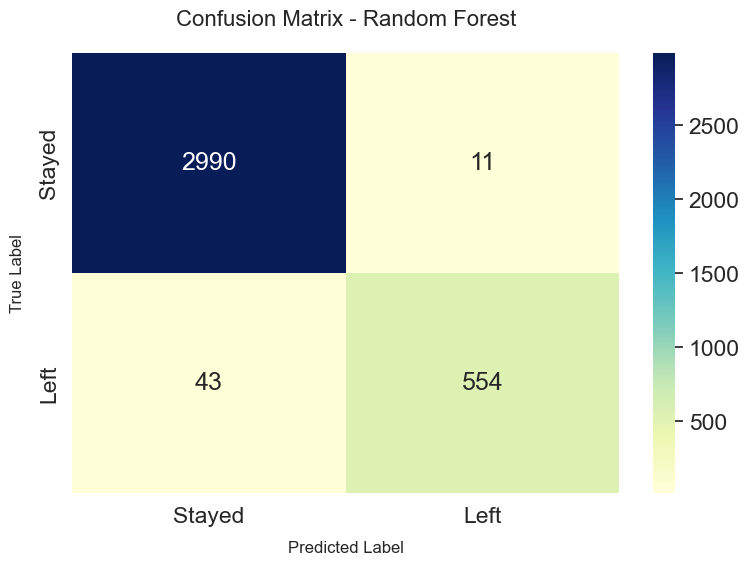

In [63]:

# Get predictions using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a more visually appealing confusion matrix using seaborn
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Stayed", "Left"],
            yticklabels=["Stayed", "Left"])

# Customize the plot
plt.title('Confusion Matrix - Random Forest', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12, labelpad=10)
plt.ylabel('True Label', fontsize=12, labelpad=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<div style="background-color:#f0f4f8; border-left: 6px solid #007acc; padding: 16px; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #333;">
  <h2 style="color:#007acc;">Confusion Matrix Interpretation</h2>
  <ul>
    <li><strong>True Positives (Top Left Cell, 2990)</strong>: These are the cases where the model correctly predicted the positive class (Stayed). The model successfully identified 2990 cases as "Stayed" where they indeed stayed.</li>
    <li><strong>False Negatives (Bottom Left Cell, 43)</strong>: These are the cases where the model incorrectly predicted the negative class (Left) for the positive instances (Stayed). The model failed to identify 43 cases that actually stayed and predicted that they would leave.</li>
    <li><strong>False Positives (Top Right Cell, 11)</strong>: These are the instances where the model incorrectly predicted the positive class (Stayed) for the negative instances (Left). The model wrongly predicted that 11 cases would stay when they actually left.</li>
    <li><strong>True Negatives (Bottom Right Cell, 554)</strong>: These are the cases where the model correctly predicted the negative class (Left). The model correctly identified 554 cases as "Left" where they indeed left.</li>
  </ul>
</div>


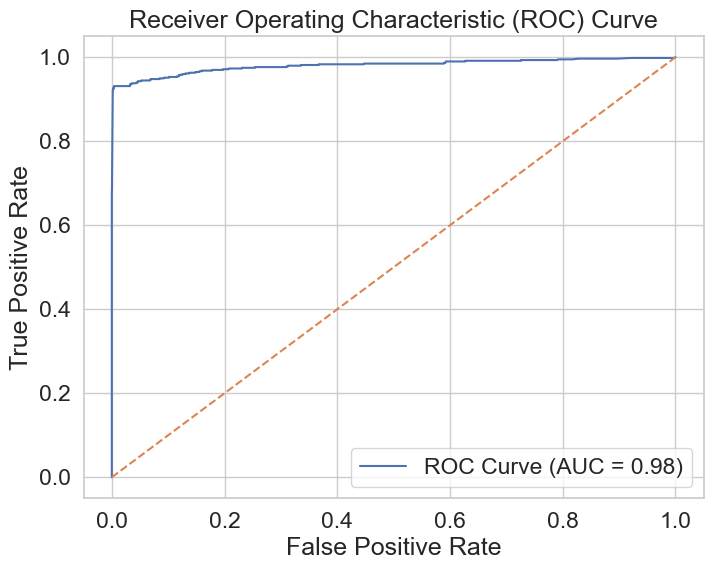

In [64]:
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The ROC curve in your image demonstrates that the model has an excellent capability in classifying the classes accurately, given the high AUC value, indicating strong predictive performance.

Feature Importances From Random Forest Model

C:\Users\murta\AppData\Local\Temp\ipykernel_27408\2670316486.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




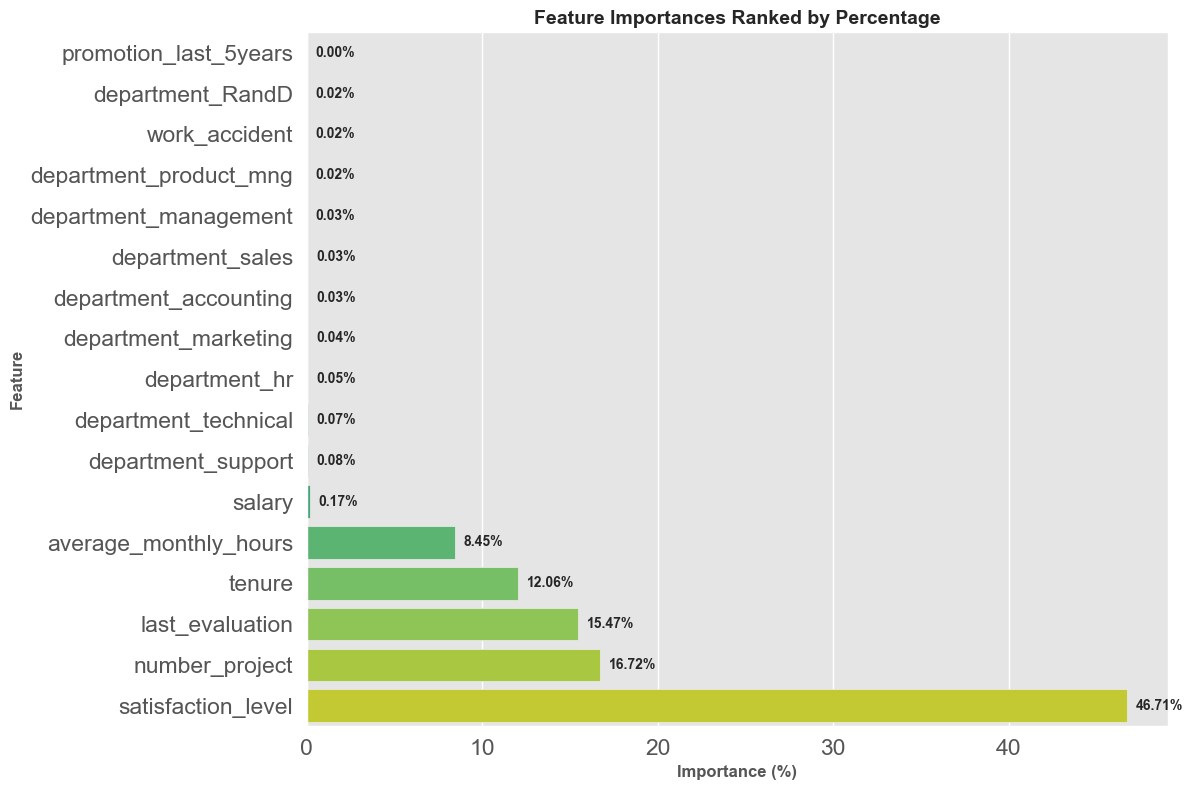

In [65]:
# Get feature importances from the Random Forest model
feature_importances_rf = best_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the features by their importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=True)

# Calculate the total sum of importances
total_importance = feature_importance_rf['Importance'].sum()

# Calculate the percentage importances
feature_importance_rf['Importance(%)'] = (feature_importance_rf['Importance'] / total_importance) * 100

# Set up the plot style
plt.style.use('ggplot')  # Using 'ggplot' style instead of 'seaborn'
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the horizontal bar chart
sns.barplot(x='Importance(%)', y='Feature', data=feature_importance_rf, 
            palette='viridis', ax=ax)

# Customize the plot
ax.set_xlabel('Importance (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Feature Importances Ranked by Percentage', fontsize=14, fontweight='bold')

# Add percentage labels to the end of each bar
for i, v in enumerate(feature_importance_rf['Importance(%)']):
    ax.text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-left: 6px solid #1e90ff; padding: 10px; font-family: Arial, sans-serif; font-size: 16px; line-height: 1.6em;">
    <strong style="color:#1e90ff; font-size: 20px;">XGBoost</strong>
    <p style="color:#000000;">XGBoost is a boosting algorithm that enhances the random forest classifier by combining decision trees iteratively to improve model accuracy and generalization.</p>
    <p style="color:#000000;">It utilizes optimization techniques and parallel processing, making it efficient and powerful for predictive tasks.</p>
    <p style="color:#000000;">By tuning hyperparameters, such as learning rate and tree depth, we can optimize the XGBoost model's performance.</p>
    <p style="color:#000000;">It handles missing data and incorporates built-in regularization to prevent overfitting.</p>
    <p style="color:#000000;">Combining XGBoost with the random forest classifier leverages their strengths for better employee turnover prediction.</p>
</div>


In [66]:
# Initialize XGBoost classifier  with binary logistic objective 


# Define the classifier
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)
# Define the parameter grid


# Define the parameter grid
param_grid = {
    "max_depth": [5, 6, 7],
    "learning_rate": [0.01, 0.1, 1.0],
    "n_estimators": [50, 100],
    "subsample": [0.8, 0.9, 1.0],
    "min_child_weight": [1, 2],
    "gamma": [0, 1, 2],
    "colsample_bytree": [0.8, 0.9, 1.0],
}

# Define the scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

# Perform Grid Search with 5-fold cross-validation
xgb_pred = GridSearchCV(xgb_clf, param_grid, scoring=scoring, cv=5, refit="f1")


<div style="background-color:#f0f8ff; border-left: 6px solid #1e90ff; padding: 10px; font-family: Arial, sans-serif; font-size: 16px; line-height: 1.6em;">
    <ul style="color:#000000;">
        <li><strong>max_depth:</strong> Controls the maximum depth of individual trees in the ensemble.</li>
        <li><strong>learning_rate:</strong> Determines the step size at each iteration of boosting to prevent overfitting.</li>
        <li><strong>n_estimators:</strong> Sets the number of boosting rounds or trees in the ensemble.</li>
        <li><strong>subsample:</strong> Defines the ratio of training instances to be randomly sampled for building each tree.</li>
        <li><strong>min_child_weight:</strong> Specifies the minimum sum of instance weight needed in a child node.</li>
        <li><strong>gamma:</strong> Defines the minimum loss reduction required to make a further partition on a leaf node.</li>
        <li><strong>colsample_bytree:</strong> Sets the subsample ratio of columns when constructing each tree.</li>
    </ul>
</div>


In [67]:
# Now fit the XGBoost model to the training data

xgb_pred.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 2], 'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [5, 6, 7], 'min_child_weight': [1, 2],
                         'n_estimators': [50, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [68]:
# Get the best estimator from the GridSearchCV
best_xgb_estimator = xgb_pred.best_estimator_

In [69]:
# print the best Hyperparameters
print("Best Hyperparameter:")
xgb_pred.best_params_

Best Hyperparameter:


{'colsample_bytree': 0.9,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1.0}

In [70]:
# Make predictions on the test set
y_pred_xgb = best_xgb_estimator.predict(X_test)

In [71]:
# Calculate accuracy
accuracy= accuracy_score(y_test, y_pred_xgb)

# Calculate precision
precision = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_xgb)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")

Evaluation Metrics: 
-------------------
Accuracy: 0.9844357976653697
Precision: 0.9787610619469026
Recall: 0.9262981574539364
F1-score: 0.9518072289156626


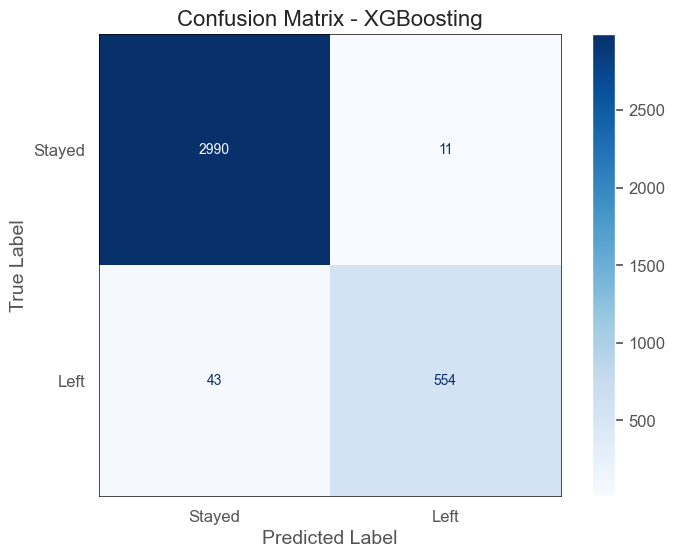

In [73]:
# Get predictions using the best XGBoosting model
y_pred_xgb = best_xgb_estimator.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Create a custom color map
cmap = sns.color_palette("Blues", as_cmap=True)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_xgb.plot(cmap=cmap, values_format='d', ax=ax)

# Enhance the plot with title and labels
ax.set_title('Confusion Matrix - XGBoosting', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the color bar
colorbar = ax.images[0].colorbar
colorbar.ax.tick_params(labelsize=12)

# Add grid lines for better cell differentiation
ax.grid(False)
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Show the plot
plt.show()

<div style="font-family: Arial, sans-serif; color: #333; background-color: #f9f9f9; padding: 20px; border-radius: 8px;">
  <h2 style="color: #2c3e50;">Confusion Matrix Analysis</h2>
  <ul style="list-style-type: none; padding: 0;">
    <li><strong>True Positives (TP):</strong> 554</li>
    <li><strong>True Negatives (TN):</strong> 2990</li>
    <li><strong>False Positives (FP):</strong> 11</li>
    <li><strong>False Negatives (FN):</strong> 43</li>
  </ul>
  
  <h2 style="color: #2c3e50;">Key Metrics Calculation</h2>
  <p><strong>1. Accuracy:</strong></p>
  <p style="margin-left: 20px;">
    <span style="font-family: 'Courier New', monospace; background-color: #e8e8e8; padding: 5px; border-radius: 5px;">
      Accuracy = (TP + TN) / (TP + TN + FP + FN) = (554 + 2990) / (554 + 2990 + 11 + 43) = 3544 / 3598 ≈ 0.9849
    </span>
    <br>
    The accuracy of the model is approximately 98.49%, indicating a high overall correctness in predictions.
  </p>
  
  <p><strong>2. Precision:</strong></p>
  <p style="margin-left: 20px;">
    <span style="font-family: 'Courier New', monospace; background-color: #e8e8e8; padding: 5px; border-radius: 5px;">
      Precision = TP / (TP + FP) = 554 / (554 + 11) ≈ 0.9805
    </span>
    <br>
    The precision for predicting employees who left is approximately 98.05%, indicating that when the model predicts an employee left, it is correct 98.05% of the time.
  </p>
  
  <p><strong>3. Recall (Sensitivity):</strong></p>
  <p style="margin-left: 20px;">
    <span style="font-family: 'Courier New', monospace; background-color: #e8e8e8; padding: 5px; border-radius: 5px;">
      Recall = TP / (TP + FN) = 554 / (554 + 43) ≈ 0.928
    </span>
    <br>
    The recall for predicting employees who left is approximately 92.8%, indicating that the model correctly identifies 92.8% of the actual employees who left.
  </p>
  
  <p><strong>4. F1 Score:</strong></p>
  <p style="margin-left: 20px;">
    <span style="font-family: 'Courier New', monospace; background-color: #e8e8e8; padding: 5px; border-radius: 5px;">
      F1 Score = 2 × (Precision × Recall) / (Precision + Recall) = 2 × (0.9805 × 0.928) / (0.9805 + 0.928) ≈ 0.9535
    </span>
    <br>
    The F1 Score is approximately 95.35%, which is a balance between precision and recall.
  </p>
  
  <h2 style="color: #2c3e50;">Observations and Insights</h2>
  <ul>
    <li><strong>High Accuracy:</strong> The model has a high overall accuracy, indicating it performs well in predicting both classes (stayed and left).</li>
    <li><strong>Low False Positives:</strong> The number of false positives (employees predicted to leave but actually stayed) is very low (11), which is beneficial in a business context as it means fewer false alarms about potential resignations.</li>
    <li><strong>Moderate False Negatives:</strong> The number of false negatives (employees predicted to stay but actually left) is relatively low (43), but improving this metric would further enhance the model's reliability, especially for retention strategies.</li>
  </ul>
  
  <h2 style="color: #2c3e50;">Potential Improvements</h2>
  <ul>
    <li><strong>Handle Class Imbalance:</strong> If there is a class imbalance, consider using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting to balance the training data.</li>
    <li><strong>Feature Engineering:</strong> Continue exploring and creating new features that might capture more nuances in the data, improving the model's ability to differentiate between the classes.</li>
    <li><strong>Hyperparameter Tuning:</strong> Further fine-tune the hyperparameters of the XGBoost model to potentially improve recall without significantly sacrificing precision.</li>
    <li><strong>Ensemble Methods:</strong> Consider using ensemble methods like stacking or blending with other models to capture more patterns in the data.</li>
  </ul>
  
  <h2 style="color: #2c3e50;">Conclusion</h2>
  <p>
    The model performs exceptionally well, with high accuracy, precision, and recall. There is room for slight improvement, particularly in reducing false negatives, to enhance its predictive power further.
  </p>
</div>


Get feature importance from the XGBoost model


C:\Users\murta\AppData\Local\Temp\ipykernel_23788\17902457.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




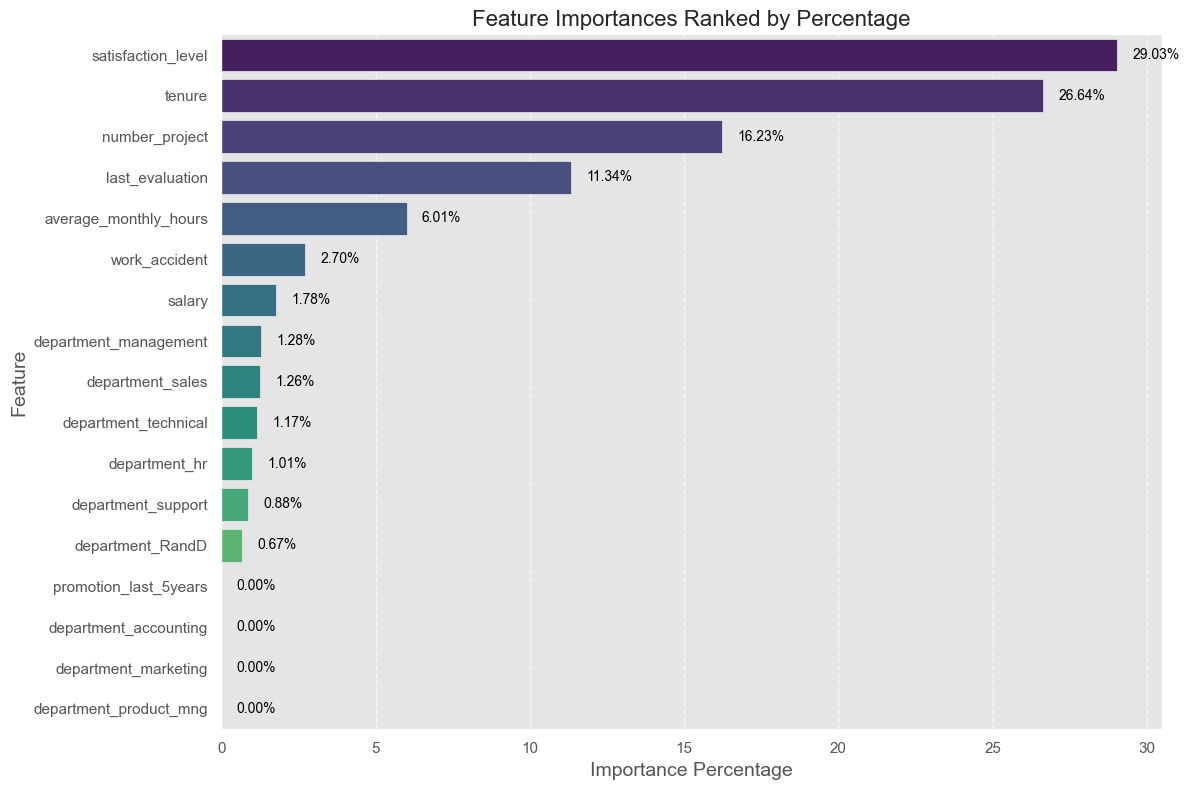

In [ ]:

# Get feature importances from the XGBoost model
feature_importances_xgb = xgb_pred.best_estimator_.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_xgb})

# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate the total sum of importances
total_importance = feature_importance_df['Importance'].sum()

# Calculate the percentage importances
feature_importance_df['Importance(Percentage)'] = (feature_importance_df['Importance'] / total_importance) * 100

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance(Percentage)', y='Feature', data=feature_importance_df, palette='viridis')

# Enhance the plot with labels, title, and grid
plt.xlabel('Importance Percentage', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances Ranked by Percentage', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add the numbers by the side of the bars
for i, v in enumerate(feature_importance_df['Importance(Percentage)']):
    plt.text(v + 0.5, i, f'{v:.2f}%', color='black', ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

<div style="font-family: Arial, sans-serif; color: #333; background-color: #f9f9f9; padding: 20px; border-radius: 8px;">
  <h2 style="color: #2c3e50;">Key Features and Their Importance</h2>
  
  <h3 style="color: #2980b9;">Satisfaction Level (29.03%):</h3>
  <p>This feature has the highest importance, indicating that employee satisfaction is a crucial predictor of whether they will leave or stay.</p>
  <p><strong>Actionable Insight:</strong> Focus on improving employee satisfaction through surveys, engagement activities, and addressing concerns.</p>
  
  <h3 style="color: #2980b9;">Tenure (26.64%):</h3>
  <p>The second most important feature, suggesting that the length of time an employee has been with the company strongly influences their likelihood to stay or leave.</p>
  <p><strong>Actionable Insight:</strong> Implement retention strategies targeting employees with different tenures, such as onboarding programs for new hires and career development for long-term employees.</p>
  
  <h3 style="color: #2980b9;">Number of Projects (16.23%):</h3>
  <p>Indicates the number of projects an employee is involved in is a significant factor.</p>
  <p><strong>Actionable Insight:</strong> Balance the workload among employees to prevent burnout and ensure job satisfaction.</p>
  
  <h3 style="color: #2980b9;">Last Evaluation (11.34%):</h3>
  <p>Reflects the importance of performance evaluations in predicting employee turnover.</p>
  <p><strong>Actionable Insight:</strong> Regularly review and improve the performance evaluation process to provide constructive feedback and growth opportunities.</p>
  
  <h3 style="color: #2980b9;">Average Monthly Hours (6.01%):</h3>
  <p>Suggests that the number of hours worked per month is a factor in employee turnover.</p>
  <p><strong>Actionable Insight:</strong> Monitor and manage working hours to ensure employees are not overworked, and promote work-life balance.</p>
  
  <h3 style="color: #2980b9;">Work Accident (2.70%):</h3>
  <p>Indicates that experiencing a work accident has a modest impact on employee turnover.</p>
  <p><strong>Actionable Insight:</strong> Enhance workplace safety measures to reduce accidents and their impact on employee morale.</p>
  
  <h3 style="color: #2980b9;">Salary (1.78%):</h3>
  <p>Although salary is less significant compared to other features, it still has an impact.</p>
  <p><strong>Actionable Insight:</strong> Ensure competitive compensation packages to retain top talent.</p>
  
  <h3 style="color: #2980b9;">Department Features (various importance levels):</h3>
  <p>Different departments have varying levels of importance, with the management department having the highest within this group (1.28%).</p>
  <p><strong>Actionable Insight:</strong> Tailor retention strategies to the specific needs and challenges of each department.</p>
  
  <h3 style="color: #e74c3c;">Features with No Importance:</h3>
  <p>Promotion in the Last 5 Years, Department Accounting, Marketing, Product Management (0%): These features did not contribute to the model's predictions in this case.</p>
  <p><strong>Actionable Insight:</strong> Re-evaluate these features to see if there are any data issues or if they truly have no impact. If they have no impact, consider excluding them from future models to simplify the model.</p>
  
  <h2 style="color: #2c3e50;">Overall Insights</h2>
  <ul>
    <li><strong>Focus on Top Features:</strong> Concentrate efforts on the top features (satisfaction level, tenure, number of projects) as they have the most significant impact on employee retention.</li>
    <li><strong>Balance Workload and Enhance Satisfaction:</strong> Balancing workload and improving job satisfaction are critical to reducing turnover.</li>
    <li><strong>Department-Specific Strategies:</strong> Develop tailored strategies for different departments based on their unique challenges and importance levels.</li>
  </ul>
</div>
